### EDA Notebook for dataset:
### Project Development. Text-to-pose experiments with humanML3D data. (Understanding dataset.)

#### (Joel markapudi.)

In [2]:
# from datasets import load_dataset
# humanml3d = load_dataset("TeoGchx/HumanML3D")
# print(humanml3d.keys())
# ---------------------------------------------


import os
from datasets import load_dataset


custom_cache_dir = r"D:\JoelDesktop folds_24\NEU SPRING25 - DL, HCI\Projects\Text-To-Pose Project\data"
os.environ["HF_DATASETS_CACHE"] = custom_cache_dir
os.makedirs(custom_cache_dir, exist_ok=True)

humanml3d = load_dataset("TeoGchx/HumanML3D", cache_dir=custom_cache_dir)
print(humanml3d.keys())

print("\n")
print("Dataset splits:", humanml3d.keys())
print("Train examples:", len(humanml3d["train"]))
print("Validation examples:", len(humanml3d["val"]))
print("Test examples:", len(humanml3d["test"]))

data_path = custom_cache_dir


dict_keys(['train', 'val', 'test'])


Dataset splits: dict_keys(['train', 'val', 'test'])
Train examples: 23384
Validation examples: 1460
Test examples: 4384


In [2]:
print(humanml3d['train'].features)

# a single example --- huuge chunk, kets do EDA instead. 
# print(humanml3d['train'][0])

print(f"Number of training examples: {len(humanml3d['train'])}")
print(f"Motion data shape for first example: {len(humanml3d['train'][0]['motion'])} frames, {len(humanml3d['train'][0]['motion'][0])} values per frame")
print("\n\n")

import random

# 30 random indices
random_indices = random.sample(range(len(humanml3d['train'])), 30)

print("Motion data shapes for 30 random examples:")
for idx in random_indices:
    sample = humanml3d['train'][idx]
    num_frames = len(sample['motion'])
    values_per_frame = len(sample['motion'][0]) if num_frames > 0 else 0
    print(f"Example {idx}: {num_frames} frames, {values_per_frame} values per frame")

{'caption': Value(dtype='string', id=None), 'motion': Sequence(feature=Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None), length=-1, id=None), 'meta_data': {'duration': Value(dtype='float64', id=None), 'name': Value(dtype='string', id=None), 'num_frames': Value(dtype='int64', id=None)}}
Number of training examples: 23384
Motion data shape for first example: 35 frames, 263 values per frame



Motion data shapes for 30 random examples:
Example 20942: 198 frames, 263 values per frame
Example 15873: 199 frames, 263 values per frame
Example 6238: 90 frames, 263 values per frame
Example 1022: 101 frames, 263 values per frame
Example 197: 199 frames, 263 values per frame
Example 20135: 38 frames, 263 values per frame
Example 19206: 162 frames, 263 values per frame
Example 5617: 164 frames, 263 values per frame
Example 18973: 199 frames, 263 values per frame
Example 13551: 199 frames, 263 values per frame
Example 18165: 199 frames, 263 values per frame
Example 4754: 190 fra

### <span style="background-color: yellow">EDA Notes.</span>


```
{'caption': Value(dtype='string', id=None), 'motion': Sequence(feature=Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None), length=-1, id=None), 'meta_data': {'duration': Value(dtype='float64', id=None), 'name': Value(dtype='string', id=None), 'num_frames': Value(dtype='int64', id=None)}}

{'caption': 'a man squats extraordinarily low then bolts up in an unsatisfactory jump.#a/DET man/NOUN squat/VERB extraordinarily/ADV low/ADJ then/ADV bolt/VERB up/ADP in/ADP an/DET unsatisfactory/ADJ jump/NOUN#0.0#0.0\na person falls to the ground in a sitting motion and then pops back up in a standing position.#a/DET person/NOUN fall/VERB to/ADP the/DET ground/NOUN in/ADP a/DET sit/VERB motion/NOUN and/CCONJ then/ADV pop/VERB back/ADV up/ADV in/ADP a/DET standing/ADJ position/NOUN#0.0#0.0\na person squats down then jumps#a/DET person/NOUN squat/VERB down/ADP then/ADV jump/VERB#0.0#0.0\na descends into a falling motion and thens bounces back up.#a/DET descend/NOUN into/ADP a/DET fall/VERB motion/NOUN and/CCONJ then/NOUN bounce/VERB back/ADV up/ADV#0.0#0.0\n', 

'motion': [[0.008842051029205322, 0.00013885425869375467, .... , 0.03456604480743408, 0.0005472221528179944, .... , 0.0003965630894526839, 1.0, 1.0, 1.0, 1.0]], 'meta_data': {'duration': 1.75, 'name': '000001', 'num_frames': 35}}
```
### Basic info on data.
- data is already normalized and processed.
- diversity for text conditioning.
- each frame contains positions for all joints. Each joint has X, Y, Z coordinates.
- 22-joint skeleton (which HumanML3D uses), expect around 66 values per frame (22 joints × 3 coordinates), plus possibly some additional values for rotation or global positioning.
- 3D pose data conceptually has a hierarchical structure (frames → joints → xyz coordinates), it's stored as a flattened array for efficient processing.

### Comparing with older project.
- ETH3D contains lower-level geometric data (points, depth values)
- HumanML3D contains higher-level semantic data (joint positions representing a human)

### About extra values in frame.
- extra values in frame ( Joint positions (22 joints × 3 coordinates = 66 values), Joint rotations (possibly in quaternions or other formats), Root motion information, Confidence values or masks, Global positioning data. )
    - Range: frame counts range from as few as 51 frames (Example 11254) to as many as 199 frames (Examples 7311, 21293, 445, 9068, 18798, 22096, 15635, 13538)
    - Distribution: wide distribution rather than standardized lengths.
    - Short actions (51 frames): Might be quick gestures like waving or jumping
    - Long actions (199 frames): Likely complex movements like walking in patterns or dance sequences





### Details of each field.
- Caption field: Contains multiple text descriptions for the same motion, which is excellent for text-to-pose generation. Each description is separated by newlines and includes both raw text and POS-tagged versions.
    - Raw text: The original natural language description
    - Example: "a man squats extraordinarily low then bolts up in an unsatisfactory jump."
    - POS-tagged version: The same text with part-of-speech tags attached to each word
    - Example: "a/DET man/NOUN squat/VERB extraordinarily/ADV low/ADJ then/ADV bolt/VERB up/ADP in/ADP an/DET unsatisfactory/ADJ jump/NOUN"



- Motion field: 3D pose data represented as a sequence of float values. joint positions in 3D space. stored as a sequence of frames, where each frame contains the positions of all joints.


## frame count distribution

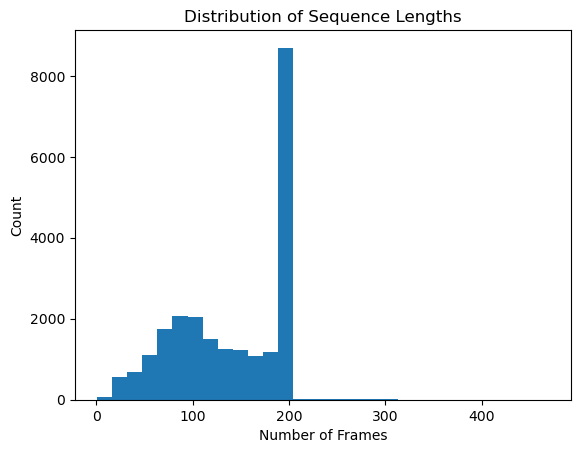

Min frames: 1
Max frames: 469
Mean frames: 140.84


In [7]:
## metadata;
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

# frame count distribution across dataset
all_frame_counts = [len(humanml3d['train'][i]['motion']) for i in range(len(humanml3d['train']))]

plt.hist(all_frame_counts, bins=30)
plt.xlabel("Number of Frames")
plt.ylabel("Count")
plt.title("Distribution of Sequence Lengths")
plt.show()

print(f"Min frames: {min(all_frame_counts)}")
print(f"Max frames: {max(all_frame_counts)}")
print(f"Mean frames: {sum(all_frame_counts)/len(all_frame_counts):.2f}")

## EDA - Caption Analysis, Stat Analysis, Ideas for Motion Data Analysis.

In [8]:
import nltk
import os

# Set your NLTK data directory
NLTK_DATA_DIR = r"D:\JoelDesktop folds_24\NEU SPRING25 - DL, HCI\Projects\Text-To-Pose Project\ext_libs\nltk_data"
os.makedirs(NLTK_DATA_DIR, exist_ok=True)

# Add the directory to NLTK's search path
nltk.data.path.append(NLTK_DATA_DIR)

# Download both punkt and punkt_tab
nltk.download('punkt', download_dir=NLTK_DATA_DIR)
nltk.download('punkt_tab', download_dir=NLTK_DATA_DIR)

# Test the tokenizer

print("\n\n")
from nltk.tokenize import word_tokenize
print(word_tokenize("This is a test sentence."))






['This', 'is', 'a', 'test', 'sentence', '.']


[nltk_data] Downloading package punkt to D:\JoelDesktop folds_24\NEU
[nltk_data]     SPRING25 - DL, HCI\Projects\Text-To-Pose
[nltk_data]     Project\ext_libs\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to D:\JoelDesktop
[nltk_data]     folds_24\NEU SPRING25 - DL, HCI\Projects\Text-To-Pose
[nltk_data]     Project\ext_libs\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


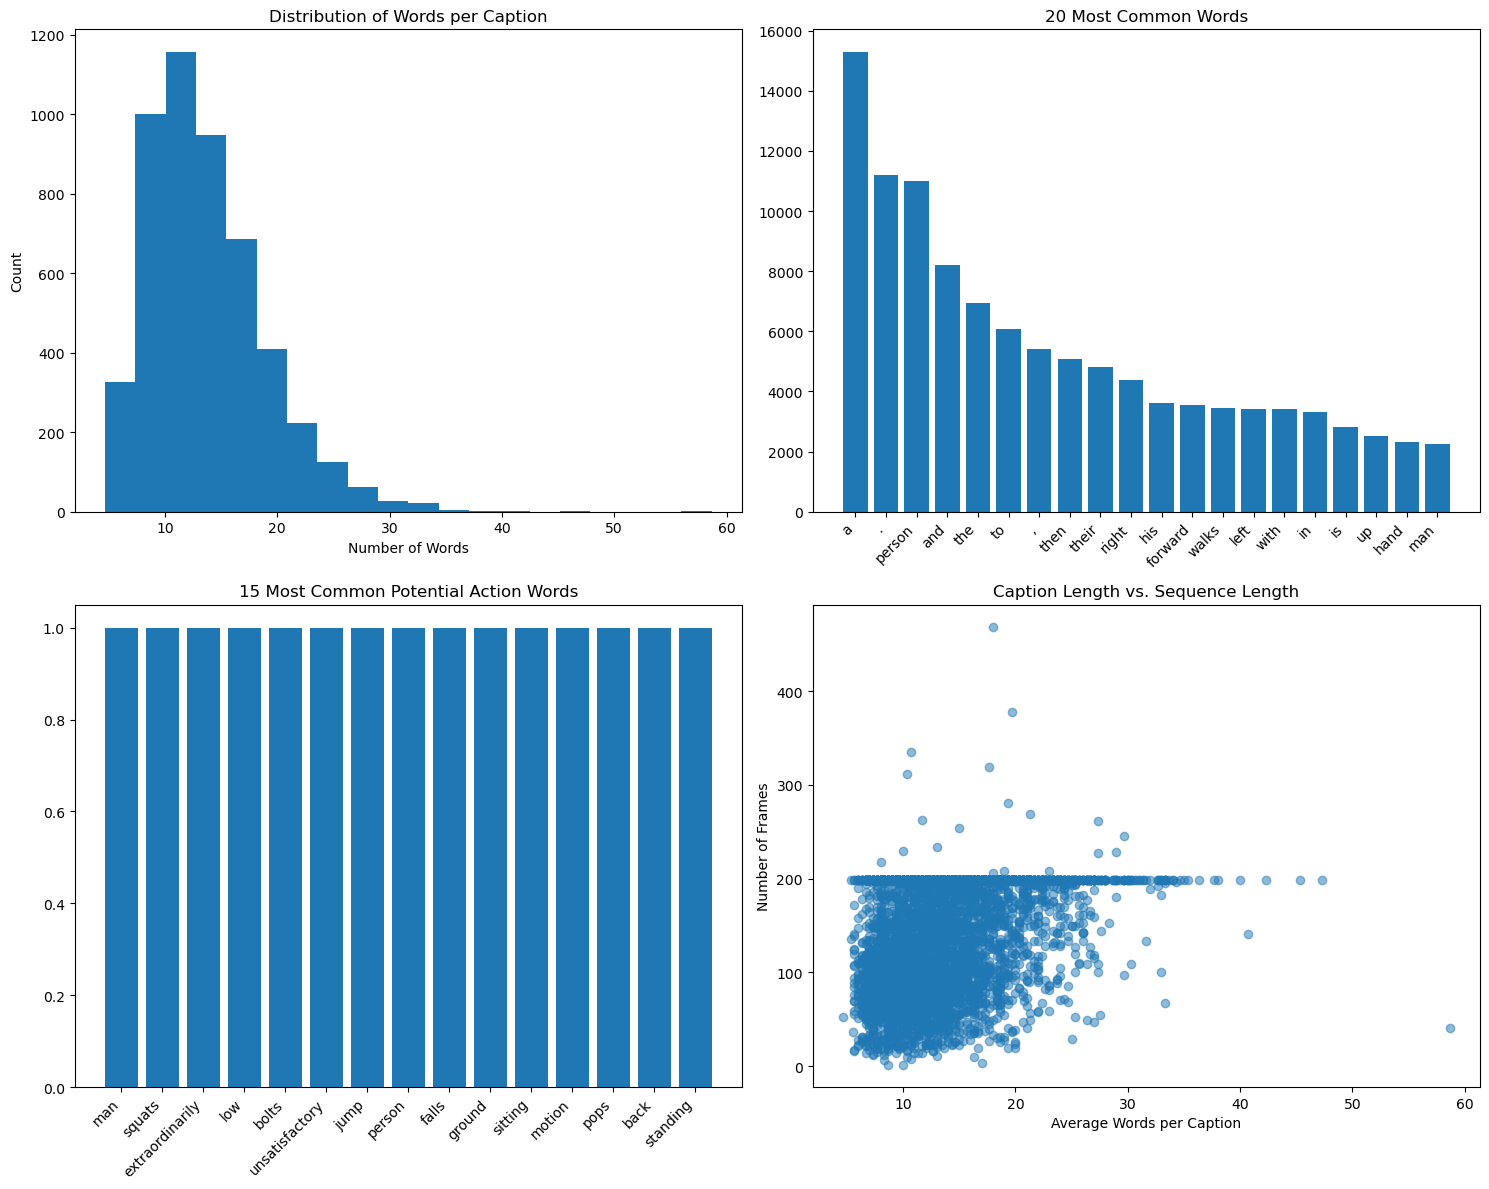

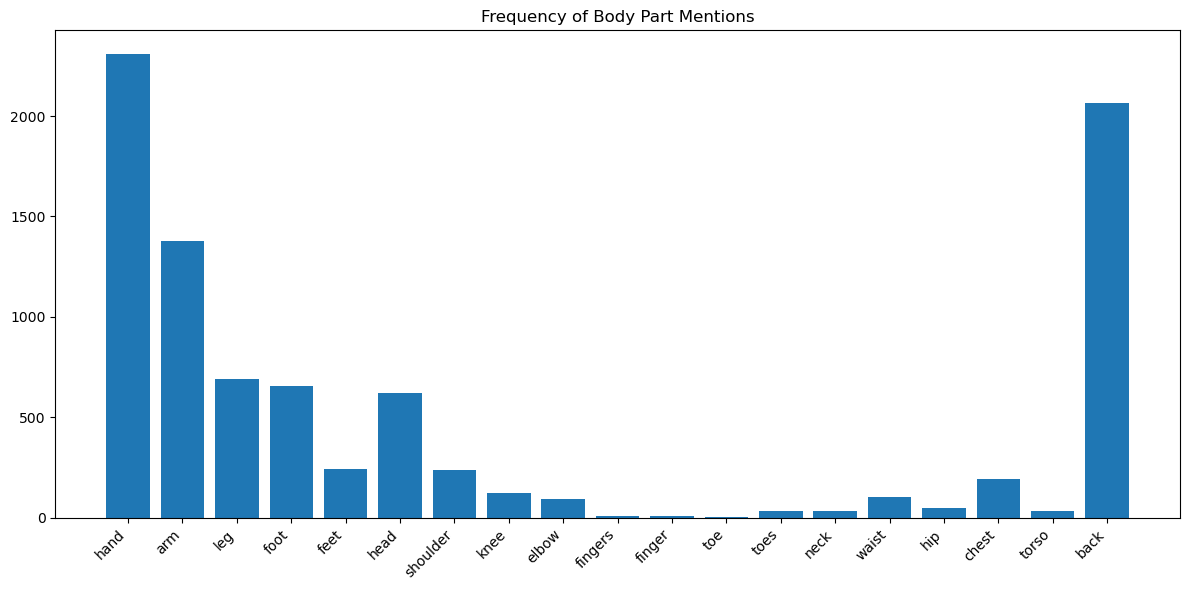

Average words per caption: 13.79
Correlation between caption length and sequence length: 0.340

Top 10 most common words:
  a: 15280
  .: 11193
  person: 10992
  and: 8199
  the: 6948
  to: 6068
  ,: 5420
  then: 5084
  their: 4801
  right: 4367

Top 10 most common action words:
  man: 1
  squats: 1
  extraordinarily: 1
  low: 1
  bolts: 1
  unsatisfactory: 1
  jump: 1
  person: 1
  falls: 1
  ground: 1


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize


# try:
#     nltk.data.find('tokenizers/punkt')
# except LookupError:
#     nltk.download('punkt')
# ------------------------------------------------------------------------------------------------------------


def analyze_captions(dataset, sample_size=None):
    """Analyze captions in the dataset for word counts, common verbs, and correlation with sequence length"""
    
    if sample_size is None:
        sample_size = len(dataset)
    
    # extract captions and split into individual descriptions 
    all_captions = []
    caption_lengths = []
    sequence_lengths = []
    
    for i in range(min(sample_size, len(dataset))):
        sample = dataset[i]
        caption_text = sample['caption']
        caption_lines = caption_text.strip().split('\n')
        
        # filtering // (not the POS-tagged versions)
        # original captions are those that don't contain '#' character
        original_captions = []
        for line in caption_lines:
            if line and '#' not in line:
                original_captions.append(line)
        
        if not original_captions:
            for line in caption_lines:
                if line:
                    parts = line.split('#')
                    if parts and parts[0]:
                        original_captions.append(parts[0])
        
        # captions to list
        if original_captions:
            all_captions.extend(original_captions)
            
            # average words per caption for this sample
            avg_caption_len = sum(len(word_tokenize(cap)) for cap in original_captions) / len(original_captions)
            caption_lengths.append(avg_caption_len)
            sequence_lengths.append(len(sample['motion']))
    
    if not all_captions:
        print("No captions were found. Printing a sample caption to debug:")
        if len(dataset) > 0:
            print(dataset[0]['caption'])
        return None

    # ------------------------------------------------------------------------
    # frequency analysis
    all_words = []
    for caption in all_captions:
        words = word_tokenize(caption.lower())
        all_words.extend(words)
    
    word_freq = Counter(all_words)


    # very primitive idea - this isnt realiable, inspect later on. 
    # potential action words
    common_stop_words = {'a', 'an', 'the', 'in', 'on', 'at', 'to', 'with', 'and', 'or', 'of', 'is', 'are', 'then', 'by', 'from'}
    potential_verbs = [word for word, count in word_freq.items() 
                     if word not in common_stop_words and len(word) > 2]
    
    # body parts to check for
    body_parts = ['hand', 'arm', 'leg', 'foot', 'feet', 'head', 'shoulder', 'knee', 'elbow', 
                 'fingers', 'finger', 'toe', 'toes', 'neck', 'waist', 'hip', 'chest', 'torso', 'back']
    body_part_freq = {part: all_words.count(part) for part in body_parts}
    
    # average words per caption
    avg_words_per_caption = sum(len(word_tokenize(cap)) for cap in all_captions) / len(all_captions)

    # ------------------------------------------------------------------------
    # histograms and correlation
    plt.figure(figsize=(15, 12))
    
    plt.subplot(2, 2, 1)
    plt.hist(caption_lengths, bins=20)
    plt.title('Distribution of Words per Caption')
    plt.xlabel('Number of Words')
    plt.ylabel('Count')
    
    plt.subplot(2, 2, 2)
    most_common_words = dict(word_freq.most_common(20))
    plt.bar(most_common_words.keys(), most_common_words.values())
    plt.title('20 Most Common Words')
    plt.xticks(rotation=45, ha='right')
    
    plt.subplot(2, 2, 3)
    most_common_verbs = dict(Counter(potential_verbs).most_common(15))
    plt.bar(most_common_verbs.keys(), most_common_verbs.values())
    plt.title('15 Most Common Potential Action Words')
    plt.xticks(rotation=45, ha='right')
    
    if caption_lengths and sequence_lengths:
        plt.subplot(2, 2, 4)
        plt.scatter(caption_lengths, sequence_lengths, alpha=0.5)
        plt.title('Caption Length vs. Sequence Length')
        plt.xlabel('Average Words per Caption')
        plt.ylabel('Number of Frames')
    
    plt.tight_layout()
    plt.show()
    
    # body part frequency
    plt.figure(figsize=(12, 6))
    plt.bar(body_part_freq.keys(), body_part_freq.values())
    plt.title('Frequency of Body Part Mentions')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return {
        'avg_words_per_caption': avg_words_per_caption,
        'most_common_words': word_freq.most_common(30),
        'potential_actions': Counter(potential_verbs).most_common(20),
        'body_part_mentions': body_part_freq,
        'caption_length_correlation': np.corrcoef(caption_lengths, sequence_lengths)[0,1] if len(caption_lengths) > 1 else 0
    }



# ------------------------------------------------------------------------
# the analysis
caption_analysis = analyze_captions(humanml3d['train'], sample_size=5000)


if caption_analysis:
    print(f"Average words per caption: {caption_analysis['avg_words_per_caption']:.2f}")
    print(f"Correlation between caption length and sequence length: {caption_analysis['caption_length_correlation']:.3f}")
    print("\nTop 10 most common words:")
    for word, count in caption_analysis['most_common_words'][:10]:
        print(f"  {word}: {count}")
        
    print("\nTop 10 most common action words:")
    for word, count in caption_analysis['potential_actions'][:10]:
        print(f"  {word}: {count}")

### Notes - Caption Analysis, Statistics:

Most captions contain between 8-15 words
The average is approximately 13.79 words per caption
Few captions exceed 30 words in length

This indicates that the text descriptions in the dataset are relatively concise, which is good for your CLIP conditioning model. It means the semantic information needed to generate poses is contained in short-to-medium length descriptions, making it easier for the multi-head attention mechanism to focus on relevant parts of the text.

Text Conditioning Focus: Your multi-head attention mechanism should particularly focus on:
Directional terms (right/left)
Major body parts (hands, arms, legs, back)
Key action verbs (squats, jumps, falls)


Dataset Characteristics: The dataset has a good balance of:
Concise descriptions (avg 14 words)
Consistent sequence lengths (200 frames typical)
Clear body part focus


Potential Challenges:
The lower frequency of fine-grained body parts might make detailed pose generation for fingers/toes less accurate


## EDA - On Motion data statistics, grouping, numeric patterns, etc.

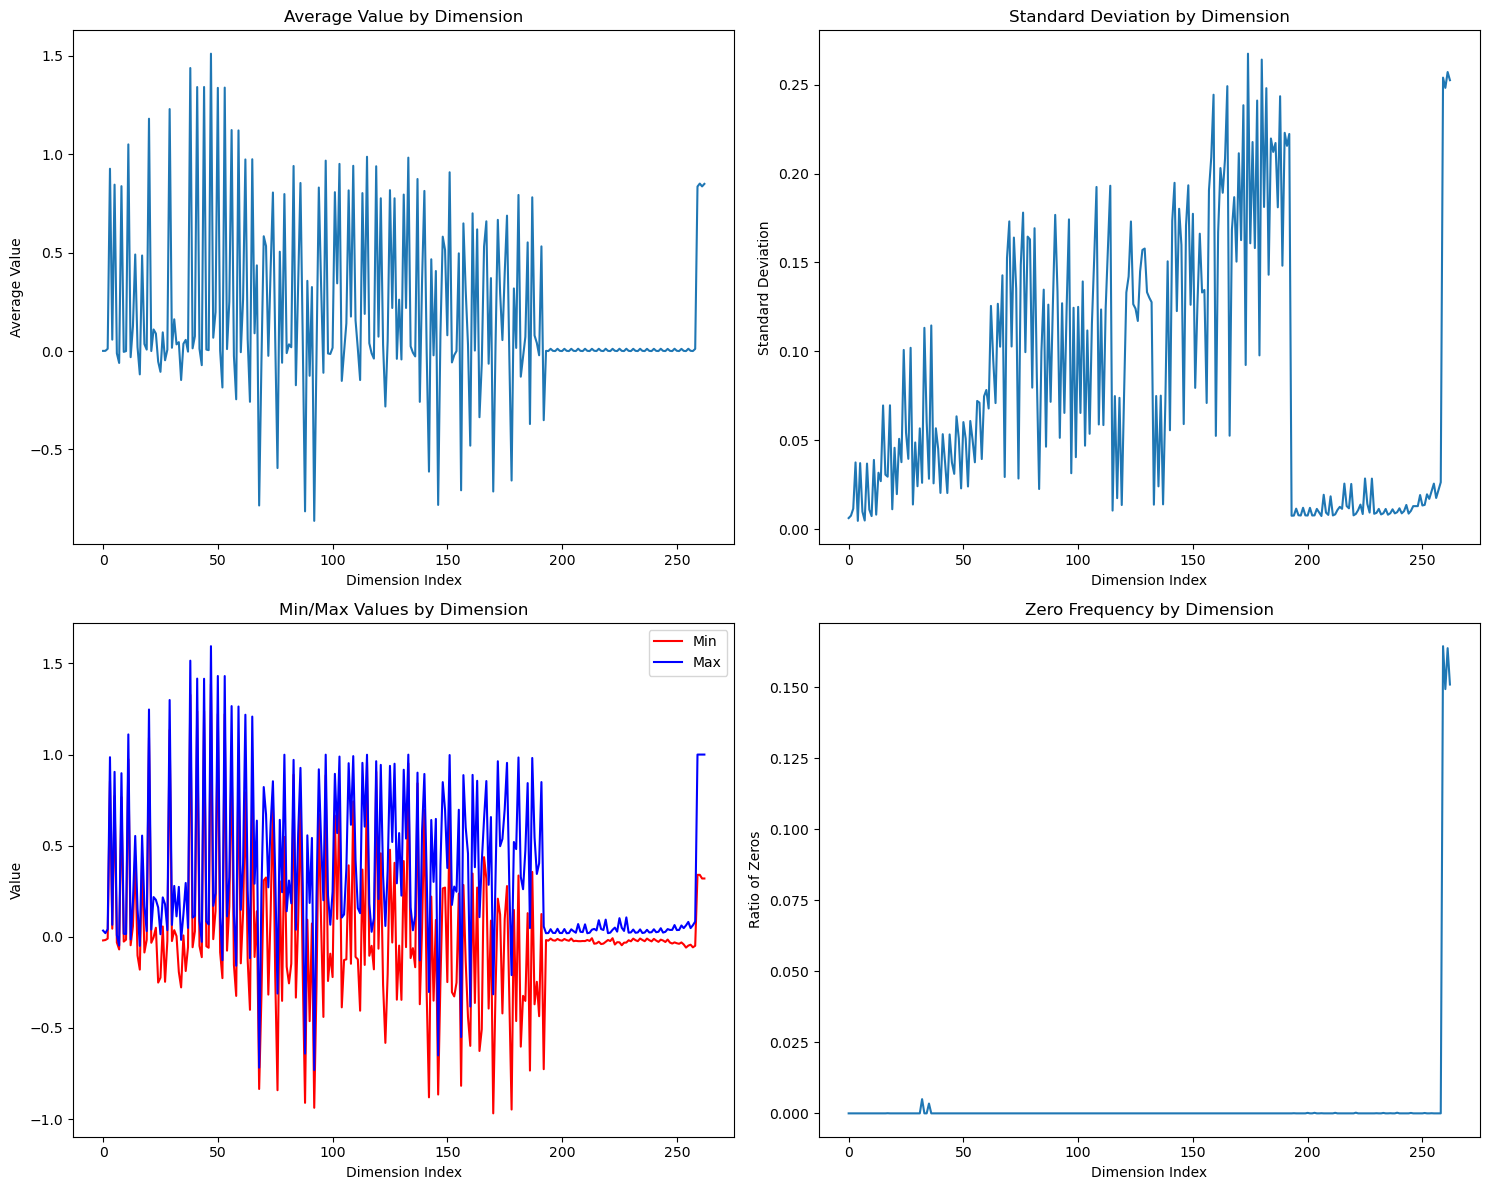

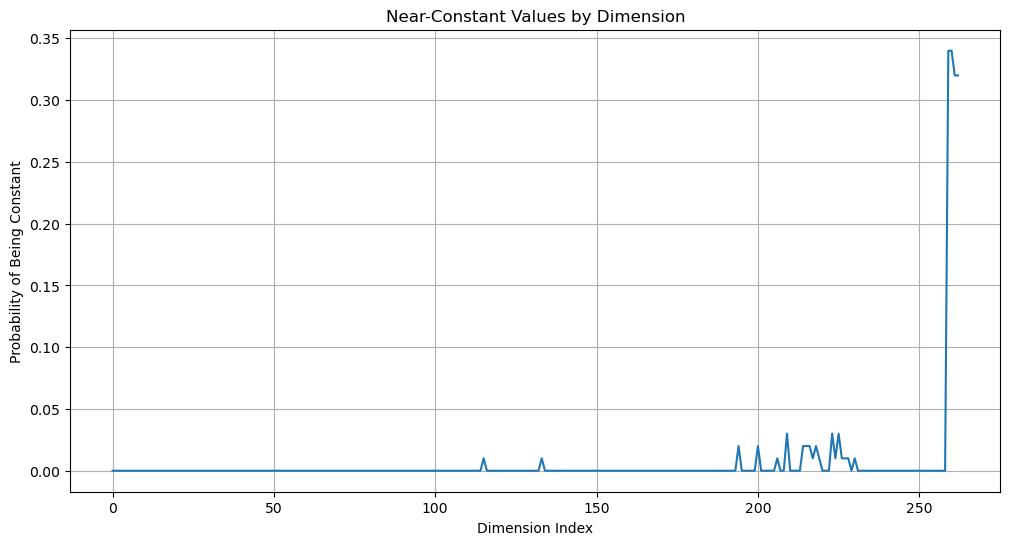

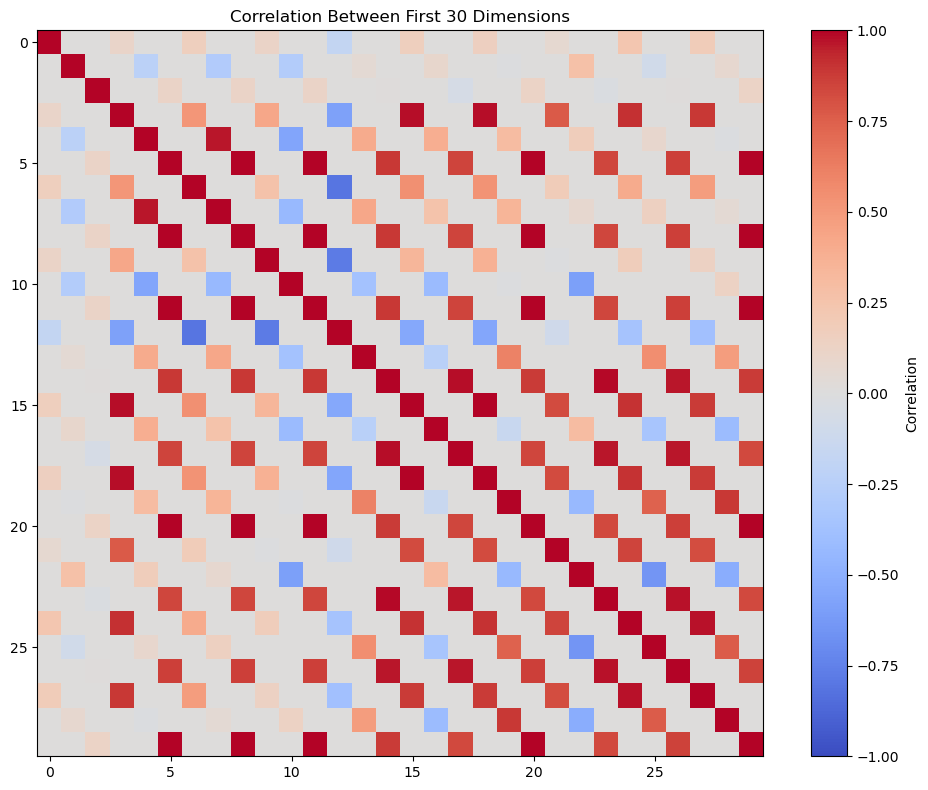

Total dimensions per frame: 263
Constant dimensions (possibly flags or padding): 0
Dimensions frequently zero: 0
Average value range across dimensions: 0.3076

Dimensions with highest variance (potential joint movements):
  Dimension 174
  Dimension 180
  Dimension 261
  Dimension 259
  Dimension 262
  Dimension 165
  Dimension 260
  Dimension 182
  Dimension 159
  Dimension 188


In [23]:
def analyze_motion_data_structure(dataset, sample_size=100):
    """Analyze the structure of motion data to understand the 263 values per frame"""
    
    # statistics across samples
    all_means = []
    all_stds = []
    all_mins = []
    all_maxs = []
    zero_ratio = []
    near_constant = []
    
    for i in range(min(sample_size, len(dataset))):
        sample = dataset[i]
        motion_data = np.array(sample['motion'])
        
        # statistics for each dimension
        means = np.mean(motion_data, axis=0)
        stds = np.std(motion_data, axis=0)
        mins = np.min(motion_data, axis=0)
        maxs = np.max(motion_data, axis=0)
        
        all_means.append(means)
        all_stds.append(stds)
        all_mins.append(mins)
        all_maxs.append(maxs)
        
        # zeros and near-constant values
        zero_ratio.append((motion_data == 0).mean(axis=0))
        near_constant.append(stds < 0.0001)
    
    # Average across samples
    avg_means = np.mean(all_means, axis=0)
    avg_stds = np.mean(all_stds, axis=0)
    avg_mins = np.mean(all_mins, axis=0)
    avg_maxs = np.mean(all_maxs, axis=0)
    avg_zero_ratio = np.mean(zero_ratio, axis=0)
    avg_near_constant = np.mean(near_constant, axis=0)
    
    # potential joint positions vs. other values
    # in many motion capture formats, joint positions are grouped in xyz triplets
    # --- to check, for pattern in the means and stds that might indicate such grouping
    
    # statistics for each dimension
    plt.figure(figsize=(15, 12))
    
    plt.subplot(2, 2, 1)
    plt.plot(avg_means)
    plt.title('Average Value by Dimension')
    plt.xlabel('Dimension Index')
    plt.ylabel('Average Value')
    
    plt.subplot(2, 2, 2)
    plt.plot(avg_stds)
    plt.title('Standard Deviation by Dimension')
    plt.xlabel('Dimension Index')
    plt.ylabel('Standard Deviation')
    
    plt.subplot(2, 2, 3)
    plt.plot(avg_mins, 'r', label='Min')
    plt.plot(avg_maxs, 'b', label='Max')
    plt.title('Min/Max Values by Dimension')
    plt.xlabel('Dimension Index')
    plt.ylabel('Value')
    plt.legend()
    
    plt.subplot(2, 2, 4)
    plt.plot(avg_zero_ratio)
    plt.title('Zero Frequency by Dimension')
    plt.xlabel('Dimension Index')
    plt.ylabel('Ratio of Zeros')
    
    plt.tight_layout()
    plt.show()
    
    # potential constant values
    plt.figure(figsize=(12, 6))
    plt.plot(avg_near_constant)
    plt.title('Near-Constant Values by Dimension')
    plt.xlabel('Dimension Index')
    plt.ylabel('Probability of Being Constant')
    plt.grid(True)
    plt.show()
    
    # for groups of 3 (xyz coordinates)
    correlation_xyz = np.zeros((261, 261))  # 261 to avoid index out of bounds
    
    # a single example for correlation analysis
    sample_motion = np.array(dataset[0]['motion'])
    for i in range(0, 261, 3):
        for j in range(0, 261, 3):
            # Calculate correlation between potential xyz triplets
            x1, y1, z1 = sample_motion[:, i], sample_motion[:, i+1], sample_motion[:, i+2]
            x2, y2, z2 = sample_motion[:, j], sample_motion[:, j+1], sample_motion[:, j+2]
            
            # Correlation between corresponding coordinates
            if not (np.std(x1) == 0 or np.std(x2) == 0):
                correlation_xyz[i, j] = np.corrcoef(x1, x2)[0,1]
            if not (np.std(y1) == 0 or np.std(y2) == 0):
                correlation_xyz[i+1, j+1] = np.corrcoef(y1, y2)[0,1]
            if not (np.std(z1) == 0 or np.std(z2) == 0):
                correlation_xyz[i+2, j+2] = np.corrcoef(z1, z2)[0,1]
    
    # correlation matrix 
    plt.figure(figsize=(10, 8))
    subset_size = 30  # Show correlation for first 30 dimensions
    plt.imshow(correlation_xyz[:subset_size, :subset_size], cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(label='Correlation')
    plt.title(f'Correlation Between First {subset_size} Dimensions')
    plt.tight_layout()
    plt.show()
    
    return {
        'dimension_count': len(avg_means),
        'constant_dimensions': np.sum(avg_near_constant > 0.9),
        'zero_heavy_dimensions': np.sum(avg_zero_ratio > 0.9),
        'potential_flags': np.where(avg_near_constant > 0.9)[0],
        'highest_variance_dims': np.argsort(avg_stds)[-10:],
        'average_value_range': np.mean(avg_maxs - avg_mins)
    }




motion_structure = analyze_motion_data_structure(humanml3d['train'])
print(f"Total dimensions per frame: {motion_structure['dimension_count']}")
print(f"Constant dimensions (possibly flags or padding): {motion_structure['constant_dimensions']}")
print(f"Dimensions frequently zero: {motion_structure['zero_heavy_dimensions']}")
print(f"Average value range across dimensions: {motion_structure['average_value_range']:.4f}")
print("\nDimensions with highest variance (potential joint movements):")
for dim in reversed(motion_structure['highest_variance_dims']):
    print(f"  Dimension {dim}")

### EDA on Motion ; Points.

```
Structural Patterns (Dimensions 0-200):
    There's a clear pattern of alternating values in the first ~200 dimensions
    Groups of three dimensions show similar patterns, strongly suggesting these represent XYZ coordinates of joints
    The oscillating pattern likely represents different body joints in sequence


Flat Region (Dimensions ~200-250):
    Around dimension 200, there's a flat region with near-zero values and very low standard deviation
    This region shows almost no variance, suggesting these might be padding values or fixed parameters


End Spike (Dimensions 250-263):
    There's increased activity at the end of the vector (dimensions ~255-263)
    These dimensions show high variance (see "Standard Deviation by Dimension" graph)
    These might represent global parameters, root positions, or control values

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------

Joint Positions (Dimensions 0-195/200):
    These likely represent the 22 joints in HumanML3D's skeleton format (22 joints × 3 coordinates = 66 dimensions)
    Additional dimensions might include velocities, rotations, or other joint properties
    The triplet pattern strongly suggests XYZ coordinates


Control Parameters (Dimensions ~200-250):
    These flat, low-variance dimensions might be binary flags or normalized parameters
    They could represent contact information, phase variables, or other motion state indicators
    The consistent low values suggest they're not actively changing during most motions

Global Parameters (Dimensions ~250-263):
    The high-variance dimensions at the end likely represent important global motion features
    These could include root position, global orientation, center of mass, or overall motion parameters
    The spike in standard deviation indicates these change significantly across frames



Dimensions with highest variance (174, 180, 261, 259, 262, 165, 260, 182, 159, 188) likely represent the most dynamic aspects of the motion

FINAL:
~195-200 dimensions for joint positions and properties (including the 22 × 3 = 66 core XYZ coordinates)
~50 dimensions for control parameters or state indicators
~10-13 dimensions for global motion parameters


```


### ACCORDING TO REPO AND RESEARCH?

```
According to the HumanML3D paper and associated GitHub repository:

Joint Positions (66 dimensions):
22 joints × 3 coordinates (x, y, z) = 66 dimensions
These represent the 3D positions of the skeleton joints in a normalized coordinate space

Joint Velocities (66 dimensions):
22 joints × 3 velocity components = 66 dimensions
These capture the rate of change of each joint position along each axis

Joint Rotations (126 dimensions):
22 joints × 6 rotation components = 132 dimensions
Uses a 6D rotation representation (continuous rotation representation from Zhou et al.)
Note: The paper mentions some datasets use only 21 joints for rotations, which would be 126 dimensions

Root (Pelvis) Information (5 dimensions):
3 dimensions for global position (x, y, z)
2 dimensions for planar orientation (projected forward direction)

This gives a total of 263 dimensions (66 + 66 + 126 + 5 = 263).

---------------------------------------------------------------------------------------------------------

Dimensions 0-65: Joint positions (22 joints × 3 coordinates)
Normalized 3D coordinates of each joint relative to a local coordinate system

Dimensions 66-131: Joint velocities (22 joints × 3 velocities)
First derivatives of joint positions, capturing motion dynamics

Dimensions 132-257/263: Joint rotations (21/22 joints × 6 rotation values)
Uses a 6D rotation representation which is more continuous than quaternions
Captures joint orientations explicitly


Dimensions 258/264-262: Root information (5 dimensions)
Global position (x, y, z) of the root joint (pelvis)
Planar orientation (2D direction vector)

```




### Whats best for T2Pose Learning?

```
Pose Extraction:
- extract a single pose from these 263 dimensions by taking a specific frame
- for a static pose, the velocity dimensions (66-131) can be set to zero or ignored

Dimensionality Reduction:
- ? only concerned with joint positions for visualization, you could use just the first 66 dimensions
- for physically accurate poses, you need both positions and rotations

Diffusion Model Target:
- diffusion model should target either the full 263-dimensional representation
- or a subset that includes at least joint positions and rotations

CLIP Conditioning:
- When conditioning on text via CLIP, the model needs to learn the mapping between semantic concepts and this structured representation
- Multi-head attention will help different attention heads specialize in different aspects of this structured representation
```

## Pose Diversity Analysis

```
- PCA or t-SNE to reduce the 66-dimensional joint positions to 2D/3D for visualization, will reveal clusters of similar poses and the overall dist.
- K-means or hierarchical clustering on joint positions, Identify 5-10 major pose categories (standing, sitting, reaching, etc.)
- Calculate the distribution of these pose types

Calculate height distribution (distance from feet to head)
Measure arm extension (distance from shoulder to hand)
Compute body orientation (direction the body is facing)
Analyze joint angle distributions for major joints (knees, elbows)

## Complexity Analysis:
Calculate a "complexity score" based on joint angles and positions
Identify simple vs. complex poses
Measure asymmetry in poses (left vs. right side differences)
```

Dataset splits available: dict_keys(['train', 'val', 'test'])
Successfully loaded 23384 training samples
Extracting 23384 random poses from dataset...


Extracting poses: 100%|██████████████████████████████████████████████████████████| 23384/23384 [35:55<00:00, 10.85it/s]



Shape of extracted poses: (23384, 66)

Applying PCA dimensionality reduction...
PCA explained variance: 56.18%

Applying t-SNE dimensionality reduction (this may take a while)...
Limiting t-SNE to 1000 poses out of 23384 total poses

Clustering poses...
Cluster 0: 9065 poses (38.8%)
Cluster 1: 954 poses (4.1%)
Cluster 2: 299 poses (1.3%)
Cluster 3: 497 poses (2.1%)
Cluster 4: 3632 poses (15.5%)
Cluster 5: 2427 poses (10.4%)
Cluster 6: 2206 poses (9.4%)
Cluster 7: 1425 poses (6.1%)
Cluster 8: 2465 poses (10.5%)
Cluster 9: 414 poses (1.8%)

Visualizing pose diversity...
PCA explained variance: 87.28%


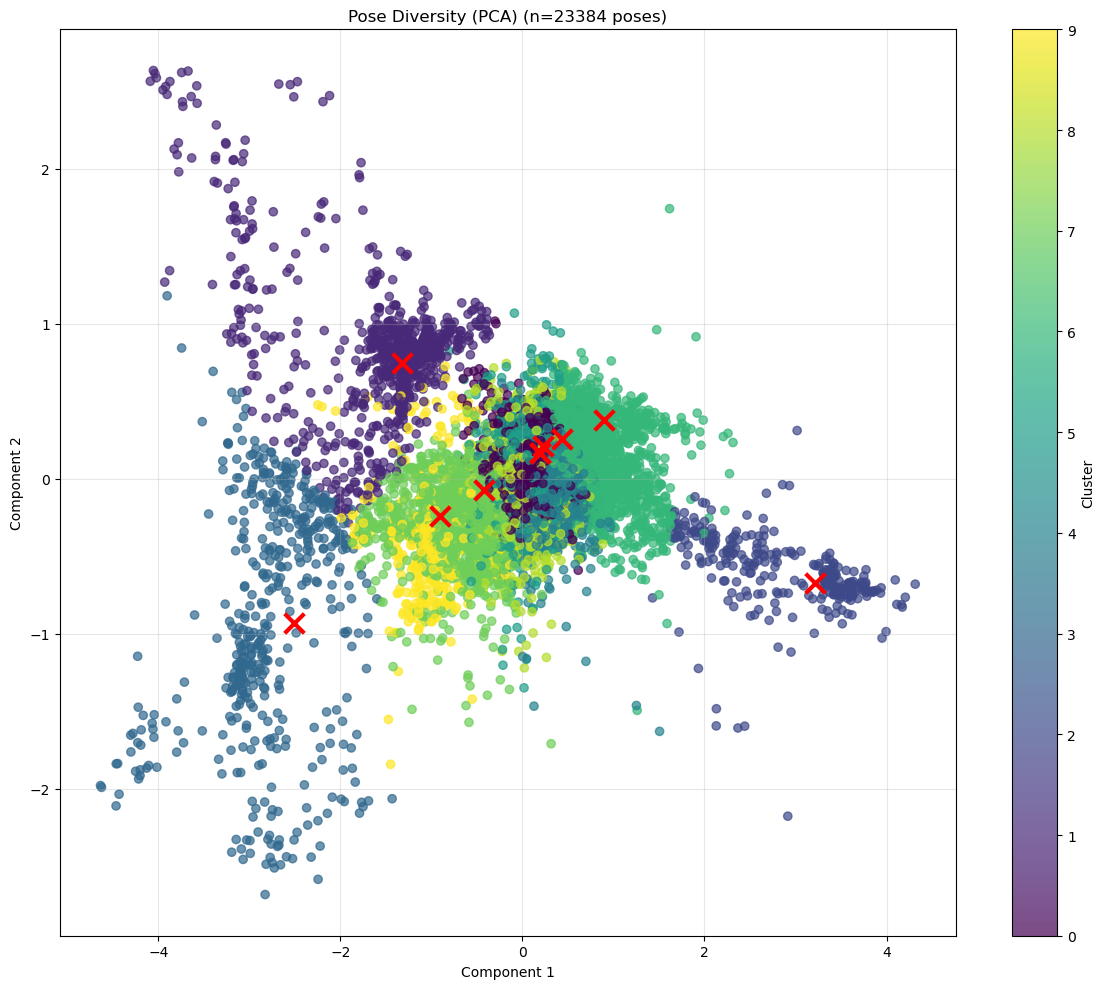

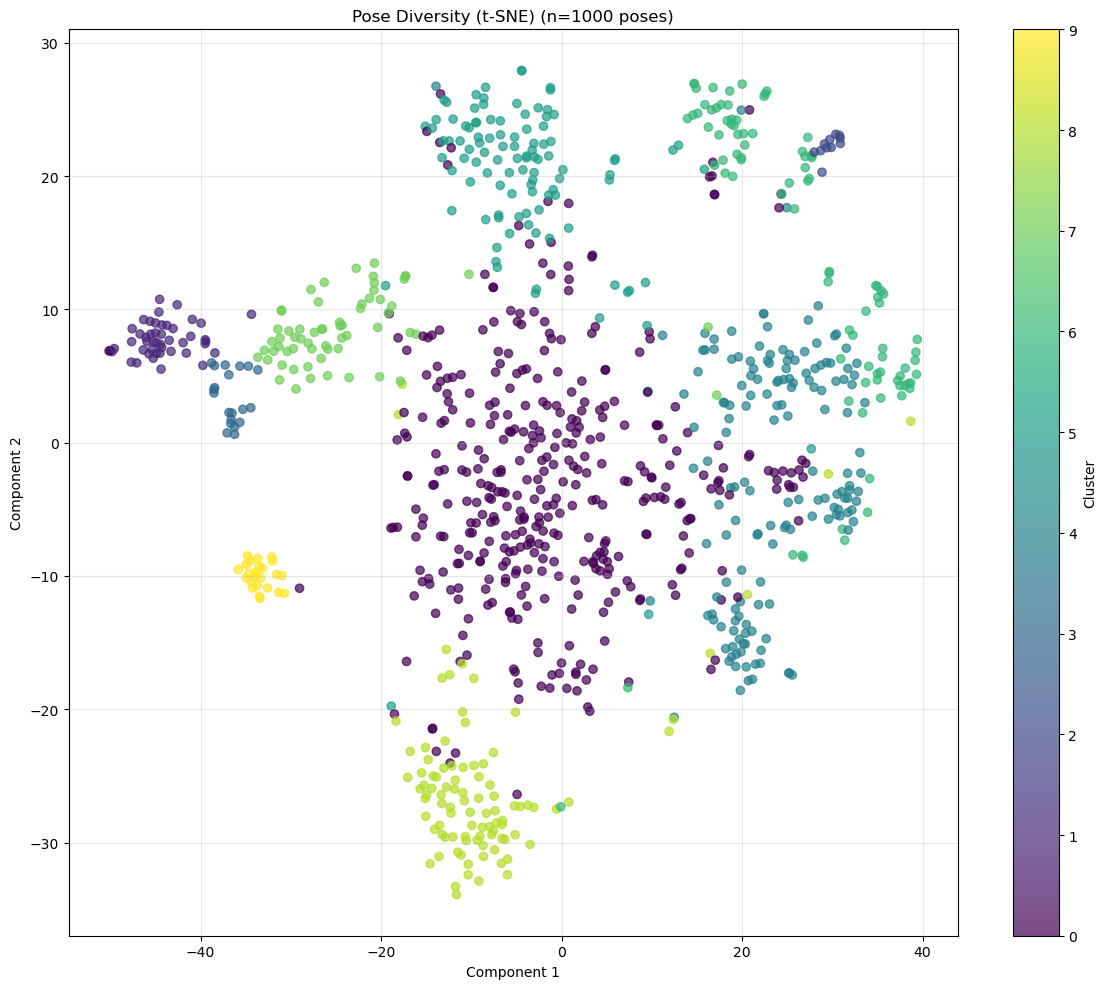


Visualizing cluster examples...

POSE CLUSTER ANALYSIS: REPRESENTATIVE TEXT DESCRIPTIONS


## CLUSTER 0: 9065 poses (38.8% of dataset)
--------------------------------------------------------------------------------
1. a person falls to their left.
2. a person stands still and does nothing.
3. a person standing straight starts walking backwards and turns.
4. figure side steps to the right.
5. a person jumps up  and then stands on both feet.


## CLUSTER 1: 954 poses (4.1% of dataset)
--------------------------------------------------------------------------------
1. swimming doing a backstroke.
2. a person does a barrel roll.
3. a person squats slightly, bending at the knees.
4. a person is sat down
5. the person is squatting and raises its arms out sideways.


## CLUSTER 2: 299 poses (1.3% of dataset)
--------------------------------------------------------------------------------
1. a person walks down stairs.
2. person does 4 kicks, two forward and two going back.
3. a person walks

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import random
import os
from tqdm import tqdm

def extract_static_poses(dataset, sample_size=1000, seed=42):
    """
    Extract random frames from motion sequences to create a dataset of static poses.
    """
    random.seed(seed)
    np.random.seed(seed)
    
    poses = []
    caption_indices = []
    
    # determine sample size based on available data
    actual_sample_size = min(sample_size, len(dataset))
    
    ## randomly sample from dataset. 
    ## random frame is selected here, and just first 66 dims. joints.
    indices = random.sample(range(len(dataset)), actual_sample_size)
    
    for i in tqdm(indices, desc="Extracting poses"):
        motion = np.array(dataset[i]['motion'])

        if len(motion) > 0:
            frame_idx = random.randint(0, len(motion)-1)
            pose = motion[frame_idx, :66]
            poses.append(pose)
            caption_indices.append(i)
    
    return np.array(poses), caption_indices


def apply_dimensionality_reduction(poses, n_components=2, method='pca'):
    """
    Apply dimensionality reduction to the poses.
    """
    if method.lower() == 'pca':
        reducer = PCA(n_components=n_components)
        reduced_poses = reducer.fit_transform(poses)
        explained_variance = reducer.explained_variance_ratio_.sum()
        print(f"PCA explained variance: {explained_variance:.2%}")
        return reduced_poses, np.arange(poses.shape[0])

    elif method.lower() == 'tsne':
        # t-SNE to maximum 1000 poses for computational efficiency
        if poses.shape[0] > 1000:
            print(f"Limiting t-SNE to 1000 poses out of {poses.shape[0]} total poses")
            
            # 1000 poses randomly, do -  t-SNE to the sampled poses, return the fit_transform and indices.
            np.random.seed(42)  
            tsne_indices = np.random.choice(poses.shape[0], size=1000, replace=False)
            tsne_poses = poses[tsne_indices]
            
            reducer = TSNE(n_components=n_components, perplexity=30, max_iter=1000)
            reduced_poses = reducer.fit_transform(tsne_poses)
            return reduced_poses, tsne_indices
        
        else:
            reducer = TSNE(n_components=n_components, perplexity=30, max_iter=1000)
            reduced_poses = reducer.fit_transform(poses)   
            return reduced_poses, np.arange(poses.shape[0])
    
    else:
        raise ValueError("Method must be 'pca' or 'tsne' lolz.")


def cluster_poses(poses, n_clusters=8):
    """
    Cluster poses using KMeans.    
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(poses)
    
    # Calculate cluster sizes
    cluster_sizes = np.bincount(clusters)
    for i, size in enumerate(cluster_sizes):
        print(f"Cluster {i}: {size} poses ({size/len(poses):.1%})")
    
    return kmeans, clusters



## borrowiing from old ML assignments etc. review for later. 
def visualize_diversity(reduced_poses, clusters, sample_indices, title="Pose Diversity"):
    """
    Visualize the diversity of poses using a scatter plot.
    """
    plt.figure(figsize=(12, 10))
    
    plotting_clusters = clusters[sample_indices]
    
    scatter = plt.scatter(reduced_poses[:, 0], reduced_poses[:, 1], 
                         c=plotting_clusters, cmap='viridis', alpha=0.7)
    
    if 'PCA' in title.upper() and 'kmeans' in globals():
        centers_2d, _ = apply_dimensionality_reduction(globals()['kmeans'].cluster_centers_, method='pca')
        plt.scatter(centers_2d[:, 0], centers_2d[:, 1], 
                   marker='x', s=200, linewidths=3, color='red', zorder=10)
    
    plt.colorbar(scatter, label='Cluster')
    plt.title(f"{title} (n={len(reduced_poses)} poses)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f"{title.replace(' ', '_').lower()}.png", dpi=300)
    plt.show()


    
def visualize_cluster_examples(dataset, clusters, caption_indices, n_examples=5):
    """
    Display example captions from each cluster in a text-based format.    
    """
    n_clusters = len(np.unique(clusters))
    cluster_sizes = [np.sum(clusters == i) for i in range(n_clusters)]
    
    print("\n" + "="*80)
    print(f"POSE CLUSTER ANALYSIS: REPRESENTATIVE TEXT DESCRIPTIONS")
    print("="*80)
    
    for cluster_id in range(n_clusters):
        # Find all poses in this cluster
        cluster_indices = np.where(clusters == cluster_id)[0]
        
        print(f"\n\n## CLUSTER {cluster_id}: {cluster_sizes[cluster_id]} poses ({cluster_sizes[cluster_id]/len(clusters):.1%} of dataset)")
        print("-" * 80)
        
        # random examples
        if len(cluster_indices) > n_examples:
            example_indices = np.random.choice(cluster_indices, n_examples, replace=False)
        else:
            example_indices = cluster_indices
        
        for i, idx in enumerate(example_indices):
            # caption for this pose
            dataset_idx = caption_indices[idx]
            
            # different keys depending on how the dataset is structured
            if 'caption' in dataset[dataset_idx]:
                caption = dataset[dataset_idx]['caption']
            elif 'text' in dataset[dataset_idx]:
                caption = dataset[dataset_idx]['text']
            else:
                caption = "Caption not found"
            
            # clean up the caption
            if isinstance(caption, str):
                # split into lines and take the first clean line (without POS tags)
                caption_lines = caption.split('\n')
                clean_caption = ""
                for line in caption_lines:
                    if line and '#' not in line:
                        clean_caption = line.strip()
                        break
                
                if not clean_caption and caption_lines:
                    # no clean line was found, take the first part of the first line
                    parts = caption_lines[0].split('#')
                    if parts and parts[0]:
                        clean_caption = parts[0].strip()
            else:
                clean_caption = str(caption)
            
            print(f"{i+1}. {clean_caption}")
        
    print("\n" + "="*80)
    # ----------------------------------------------------------------------------------------------------------------------------------
    # ----------------------------------------------------------------------------------------------------------------------------------
    
    
    # save to a text file for documentation
    with open("cluster_examples.txt", "w") as f:
        f.write("POSE CLUSTER ANALYSIS: REPRESENTATIVE TEXT DESCRIPTIONS\n")
        f.write("="*80 + "\n\n")
        
        for cluster_id in range(n_clusters):
            cluster_indices = np.where(clusters == cluster_id)[0]
            
            f.write(f"## CLUSTER {cluster_id}: {cluster_sizes[cluster_id]} poses ({cluster_sizes[cluster_id]/len(clusters):.1%} of dataset)\n")
            f.write("-" * 80 + "\n")
            
            if len(cluster_indices) > n_examples:
                example_indices = np.random.choice(cluster_indices, n_examples, replace=False)
            else:
                example_indices = cluster_indices
            
            for i, idx in enumerate(example_indices):
                dataset_idx = caption_indices[idx]
                
                # Handle different dataset structures
                if 'caption' in dataset[dataset_idx]:
                    caption = dataset[dataset_idx]['caption']
                elif 'text' in dataset[dataset_idx]:
                    caption = dataset[dataset_idx]['text']
                else:
                    caption = "Caption not found"
                
                if isinstance(caption, str):
                    caption_lines = caption.split('\n')
                    clean_caption = ""
                    for line in caption_lines:
                        if line and '#' not in line:
                            clean_caption = line.strip()
                            break
                    
                    if not clean_caption and caption_lines:
                        parts = caption_lines[0].split('#')
                        if parts and parts[0]:
                            clean_caption = parts[0].strip()
                else:
                    clean_caption = str(caption)
                
                f.write(f"{i+1}. {clean_caption}\n")
            
            f.write("\n\n")
            
    print(f"\nText examples also saved to 'cluster_examples.txt'")
    
    return {
        'cluster_sizes': cluster_sizes,
        'cluster_percentages': [size/len(clusters) for size in cluster_sizes]
    }


## --------------------------------------------------------------------------------------------------------------------------------
## --------------------------------------------------------------------------------------------------------------------------------


def analyze_pose_diversity(dataset, sample_size=1000, n_clusters=8):
    """
    Main function to analyze pose diversity in the dataset.
    """
    print(f"Extracting {sample_size} random poses from dataset...")
    poses, caption_indices = extract_static_poses(dataset, sample_size)
    
    print(f"\nShape of extracted poses: {poses.shape}")
    
    # Apply PCA for visualization
    print("\nApplying PCA dimensionality reduction...")
    reduced_poses_pca, pca_indices = apply_dimensionality_reduction(poses, method='pca')
    
    # Apply t-SNE for possibly better clustering visualization
    print("\nApplying t-SNE dimensionality reduction (this may take a while)...")
    reduced_poses_tsne, tsne_indices = apply_dimensionality_reduction(poses, method='tsne')
    
    # Cluster the poses in original high-dimensional space
    print("\nClustering poses...")
    global kmeans  # Make it accessible in visualization function
    kmeans, clusters = cluster_poses(poses, n_clusters)
    
    # Visualize the clusters
    print("\nVisualizing pose diversity...")
    visualize_diversity(reduced_poses_pca, clusters, pca_indices, title="Pose Diversity (PCA)")
    visualize_diversity(reduced_poses_tsne, clusters, tsne_indices, title="Pose Diversity (t-SNE)")
    
    # example captions from each cluster
    print("\nVisualizing cluster examples...")
    visualize_cluster_examples(dataset, clusters, caption_indices)
    
    print("\nPose diversity analysis complete!")
    
    return {
        'poses': poses,
        'reduced_poses_pca': reduced_poses_pca,
        'reduced_poses_tsne': reduced_poses_tsne,
        'clusters': clusters,
        'caption_indices': caption_indices,
        'kmeans': kmeans,
        'tsne_indices': tsne_indices
    }



import os
import sys


def main():
    
    try:
        
    #     # Check if the HumanML3D dataset is already loaded in the global scope
    #     if 'humanml3d' not in globals():
    #         from datasets import load_dataset
    #         print("Loading HumanML3D dataset...")
            
    #         # Set the custom cache directory if needed
    #         custom_cache_dir = r"D:\JoelDesktop folds_24\NEU SPRING25 - DL, HCI\Projects\Text-To-Pose Project\data"
    #         humanml3d = load_dataset("TeoGchx/HumanML3D", cache_dir=custom_cache_dir)
    #     else:
    #         print("Using already loaded HumanML3D dataset")
            
        print(f"Dataset splits available: {humanml3d.keys()}")
        print(f"Successfully loaded {len(humanml3d['train'])} training samples")

        sample_size = 23384    # full dataset or adjust based on your needs
        n_clusters = 10       # adj. number of clusters
        results = analyze_pose_diversity(humanml3d['train'], sample_size=sample_size, n_clusters=n_clusters)
        
        save_path = "pose_diversity_results"
        os.makedirs(save_path, exist_ok=True)
        np.save(f"{save_path}/reduced_poses_pca.npy", results['reduced_poses_pca'])
        np.save(f"{save_path}/reduced_poses_tsne.npy", results['reduced_poses_tsne'])
        
        np.save(f"{save_path}/clusters.npy", results['clusters'])
        
        np.save(f"{save_path}/caption_indices.npy", results['caption_indices'])
        np.save(f"{save_path}/tsne_indices.npy", results['tsne_indices'])
        print(f"Results saved to {save_path}")

        return results
        
    except ImportError as e:
        print(f"Error loading dataset: {e}")
        print("\nMake sure you have the 'datasets' library installed:")
        print("pip install datasets")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        import traceback
        traceback.print_exc()
        return None


# Run the main function when executed as a script
if __name__ == "__main__":
    main()

```
for 10k
Shape of extracted poses: (10000, 66)

Applying PCA dimensionality reduction...
PCA explained variance: 55.74%

Applying t-SNE dimensionality reduction (this may take a while)...
Limiting t-SNE to 1000 poses out of 10000 total poses

Clustering poses...
Cluster 0: 717 poses (7.2%)
Cluster 1: 399 poses (4.0%)
Cluster 2: 1266 poses (12.7%)
Cluster 3: 2138 poses (21.4%)
Cluster 4: 235 poses (2.4%)
Cluster 5: 146 poses (1.5%)
Cluster 6: 185 poses (1.8%)
Cluster 7: 4914 poses (49.1%)

Visualizing pose diversity...
PCA explained variance: 88.06%



```

### Complete Cluster MatchTable Display

target_clusters = [1,2,3,4,5,6,7]

In [17]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Path to your saved clusters.npy file
clusters_path = r"D:\JoelDesktop folds_24\NEU SPRING25 - DL, HCI\Projects\Text-To-Pose Project\pose_diversity_results\clusters.npy"

# Load the cluster assignments
try:
    clusters = np.load(clusters_path)
    print(f"Successfully loaded cluster assignments with shape: {clusters.shape}")
    print(f"Data type: {clusters.dtype}")
except FileNotFoundError:
    print(f"File not found: {clusters_path}")
    print("Please provide the correct path to your clusters.npy file")
    clusters = None

if clusters is not None:
    # Load the HumanML3D dataset to get the captions
    custom_cache_dir = r"D:\JoelDesktop folds_24\NEU SPRING25 - DL, HCI\Projects\Text-To-Pose Project\data"
    print("Loading HumanML3D dataset to get pose descriptions...")
    humanml3d = load_dataset("TeoGchx/HumanML3D", cache_dir=custom_cache_dir)
    
    # Count poses per cluster
    unique_clusters, counts = np.unique(clusters, return_counts=True)
    
    print("\nCluster Distribution:")
    for cluster, count in zip(unique_clusters, counts):
        print(f"Cluster {cluster}: {count} poses ({count/len(clusters)*100:.2f}%)")



Successfully loaded cluster assignments with shape: (23384,)
Data type: int32
Loading HumanML3D dataset to get pose descriptions...

Cluster Distribution:
Cluster 0: 9065 poses (38.77%)
Cluster 1: 954 poses (4.08%)
Cluster 2: 299 poses (1.28%)
Cluster 3: 497 poses (2.13%)
Cluster 4: 3632 poses (15.53%)
Cluster 5: 2427 poses (10.38%)
Cluster 6: 2206 poses (9.43%)
Cluster 7: 1425 poses (6.09%)
Cluster 8: 2465 poses (10.54%)
Cluster 9: 414 poses (1.77%)


Loading HumanML3D dataset...
Dataset loaded with splits: dict_keys(['train', 'val', 'test'])
Processing sample data from HumanML3D dataset...
==== HumanML3D Joint Statistics (Raw) ====
 0:  mean(XYZ)=(-0.001,+0.002,+0.020)
 1:  mean(XYZ)=(+0.892,+0.060,+0.812)
 2:  mean(XYZ)=(-0.010,-0.058,+0.802)
 3:  mean(XYZ)=(-0.002,-0.003,+1.013)
 4:  mean(XYZ)=(-0.036,+0.135,+0.482)
 5:  mean(XYZ)=(+0.069,-0.124,+0.487)
 6:  mean(XYZ)=(+0.089,+0.002,+1.137)
 7:  mean(XYZ)=(+0.004,+0.104,+0.109)
 8:  mean(XYZ)=(-0.044,-0.097,+0.116)
 9:  mean(XYZ)=(-0.029,+0.001,+1.185)
10:  mean(XYZ)=(+0.024,+0.148,+0.051)
11:  mean(XYZ)=(+0.052,-0.143,+0.054)
12:  mean(XYZ)=(+0.068,-0.015,+1.391)
13:  mean(XYZ)=(+0.036,+0.066,+1.298)
14:  mean(XYZ)=(+0.026,-0.081,+1.294)
15:  mean(XYZ)=(+0.022,-0.010,+1.460)
16:  mean(XYZ)=(+0.096,+0.188,+1.295)
17:  mean(XYZ)=(+0.014,-0.196,+1.286)
18:  mean(XYZ)=(+0.025,+0.241,+1.091)
19:  mean(XYZ)=(-0.040,-0.256,+1.062)
20:  mean(XYZ)=(+0.002,+0.254,+0.933)
21:  mean(XYZ)=(+

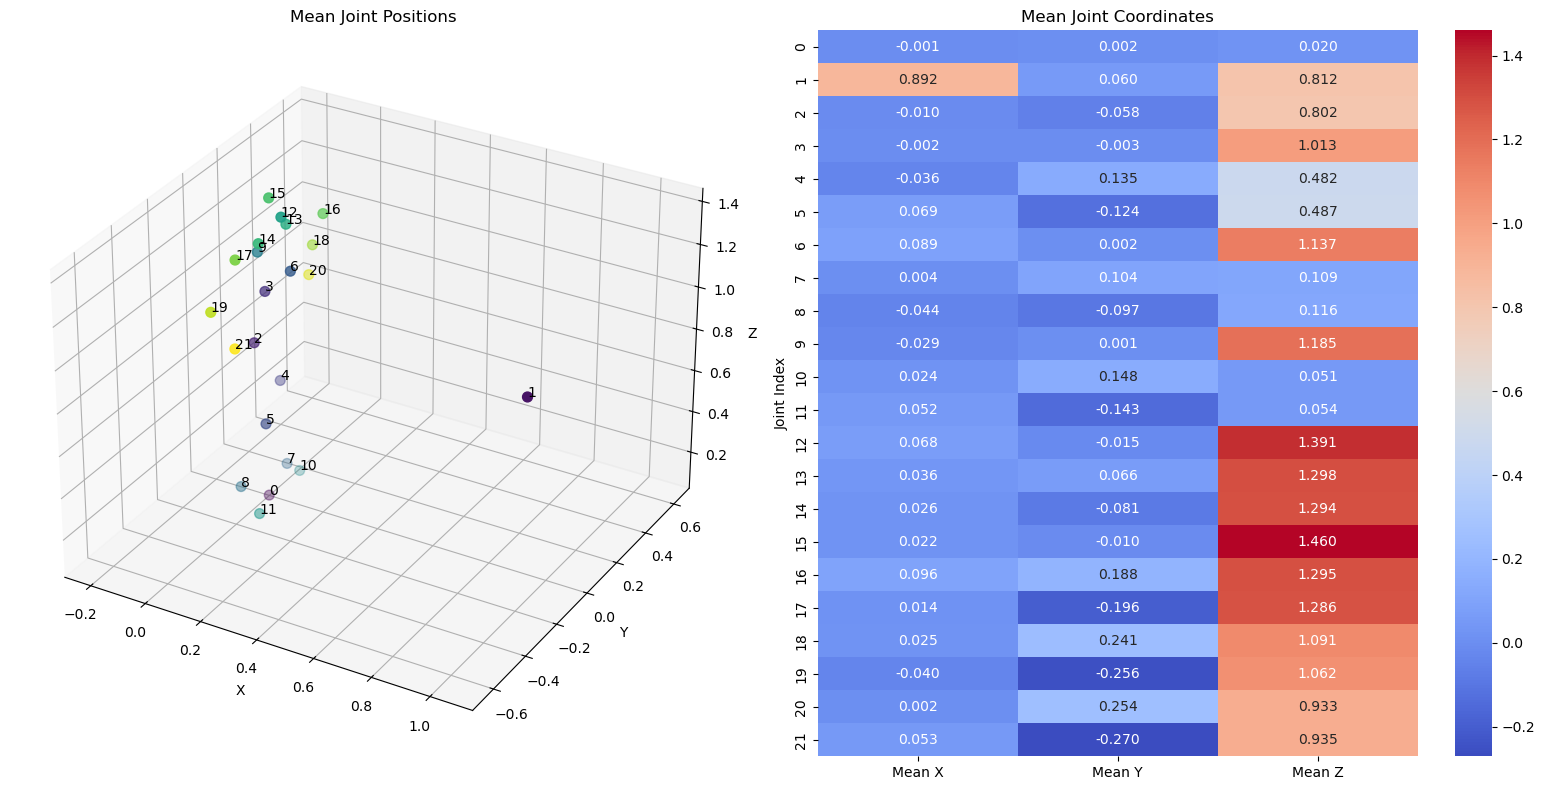

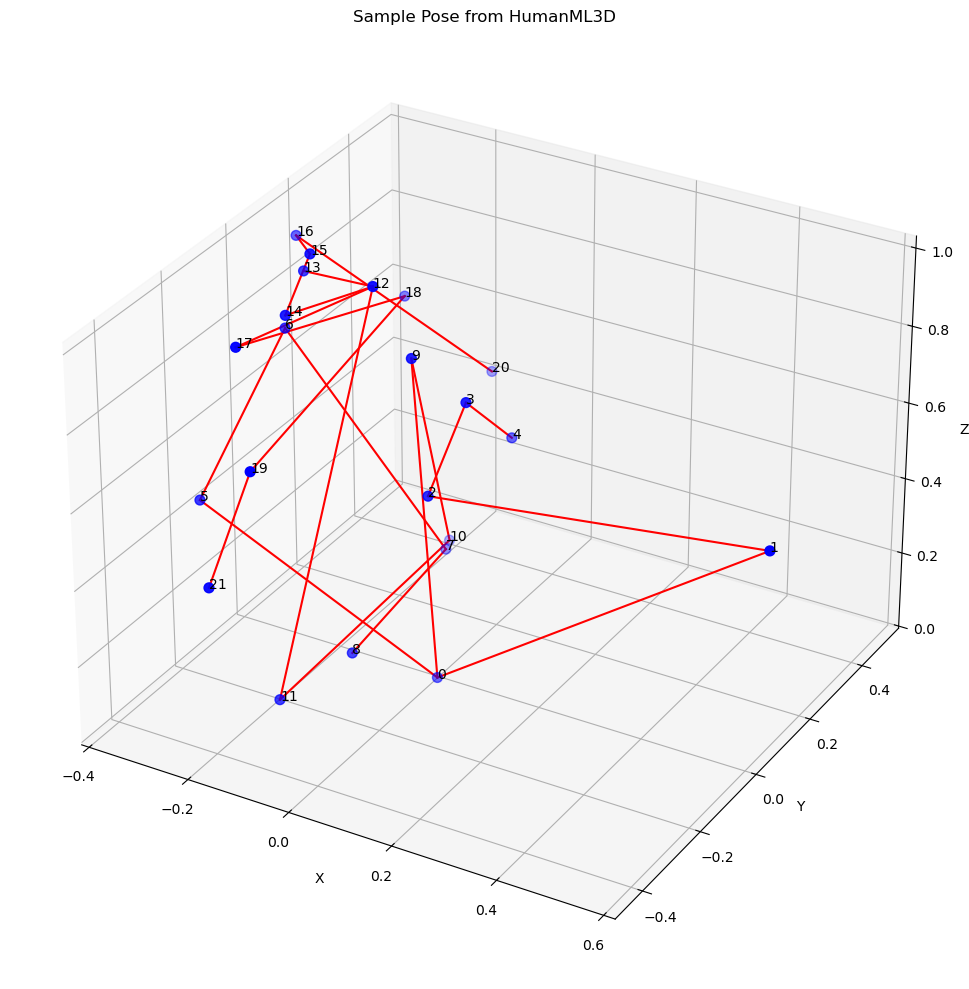

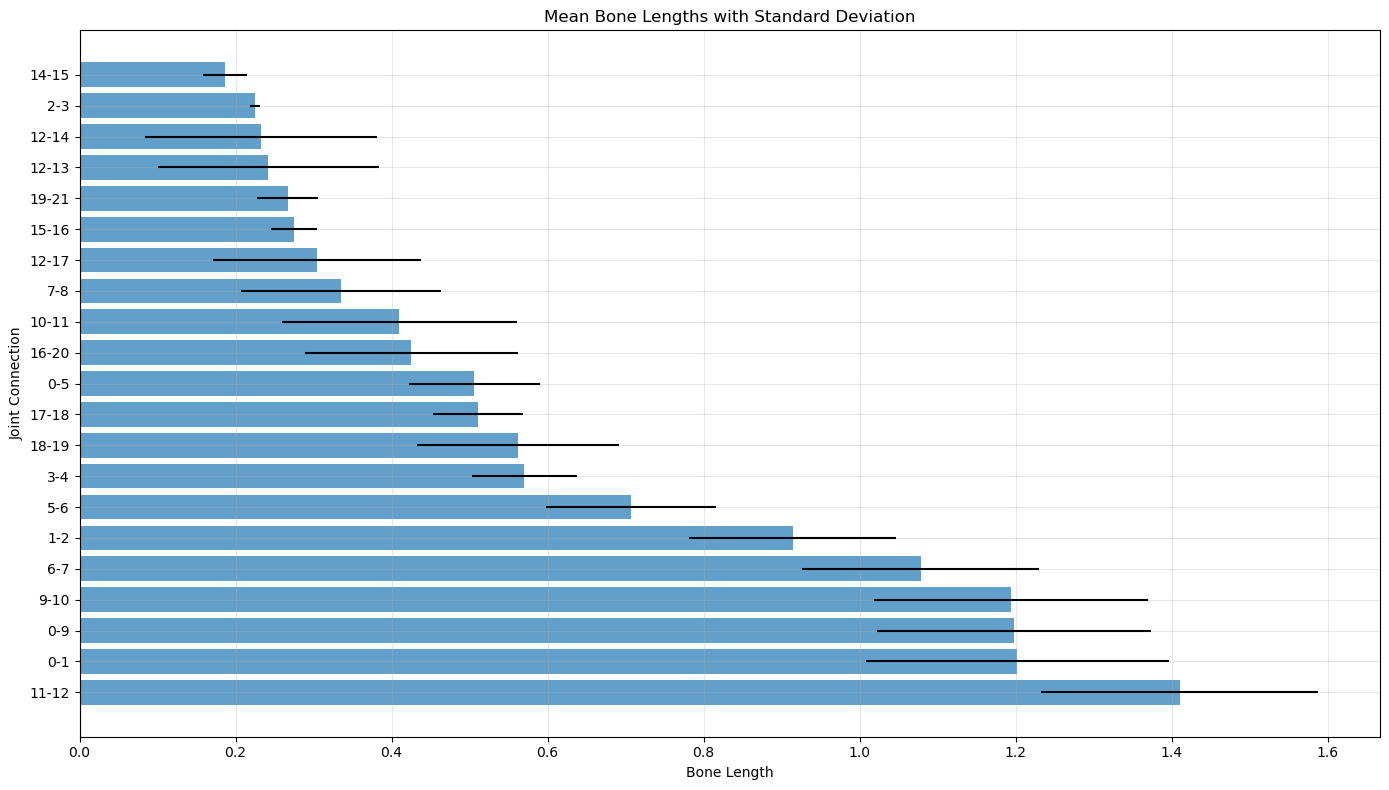

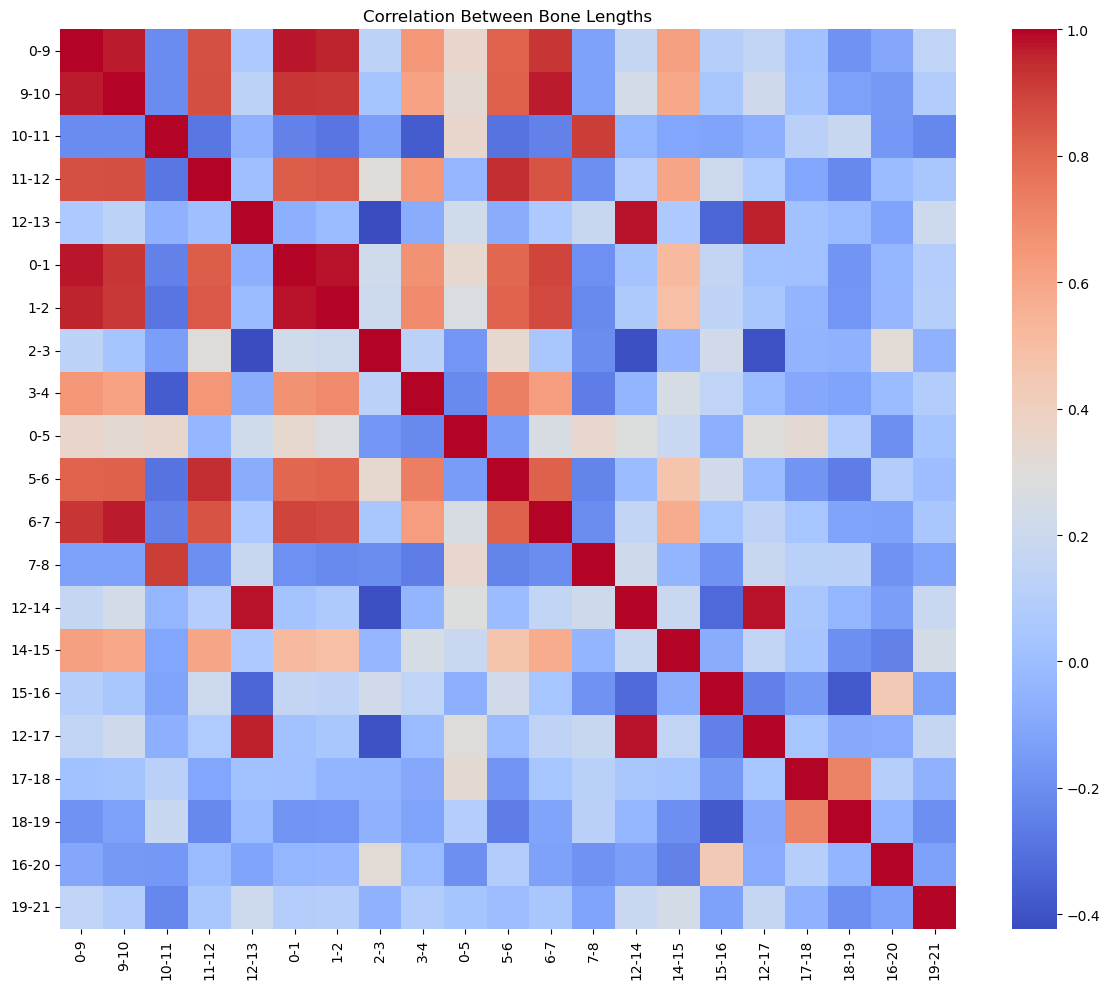

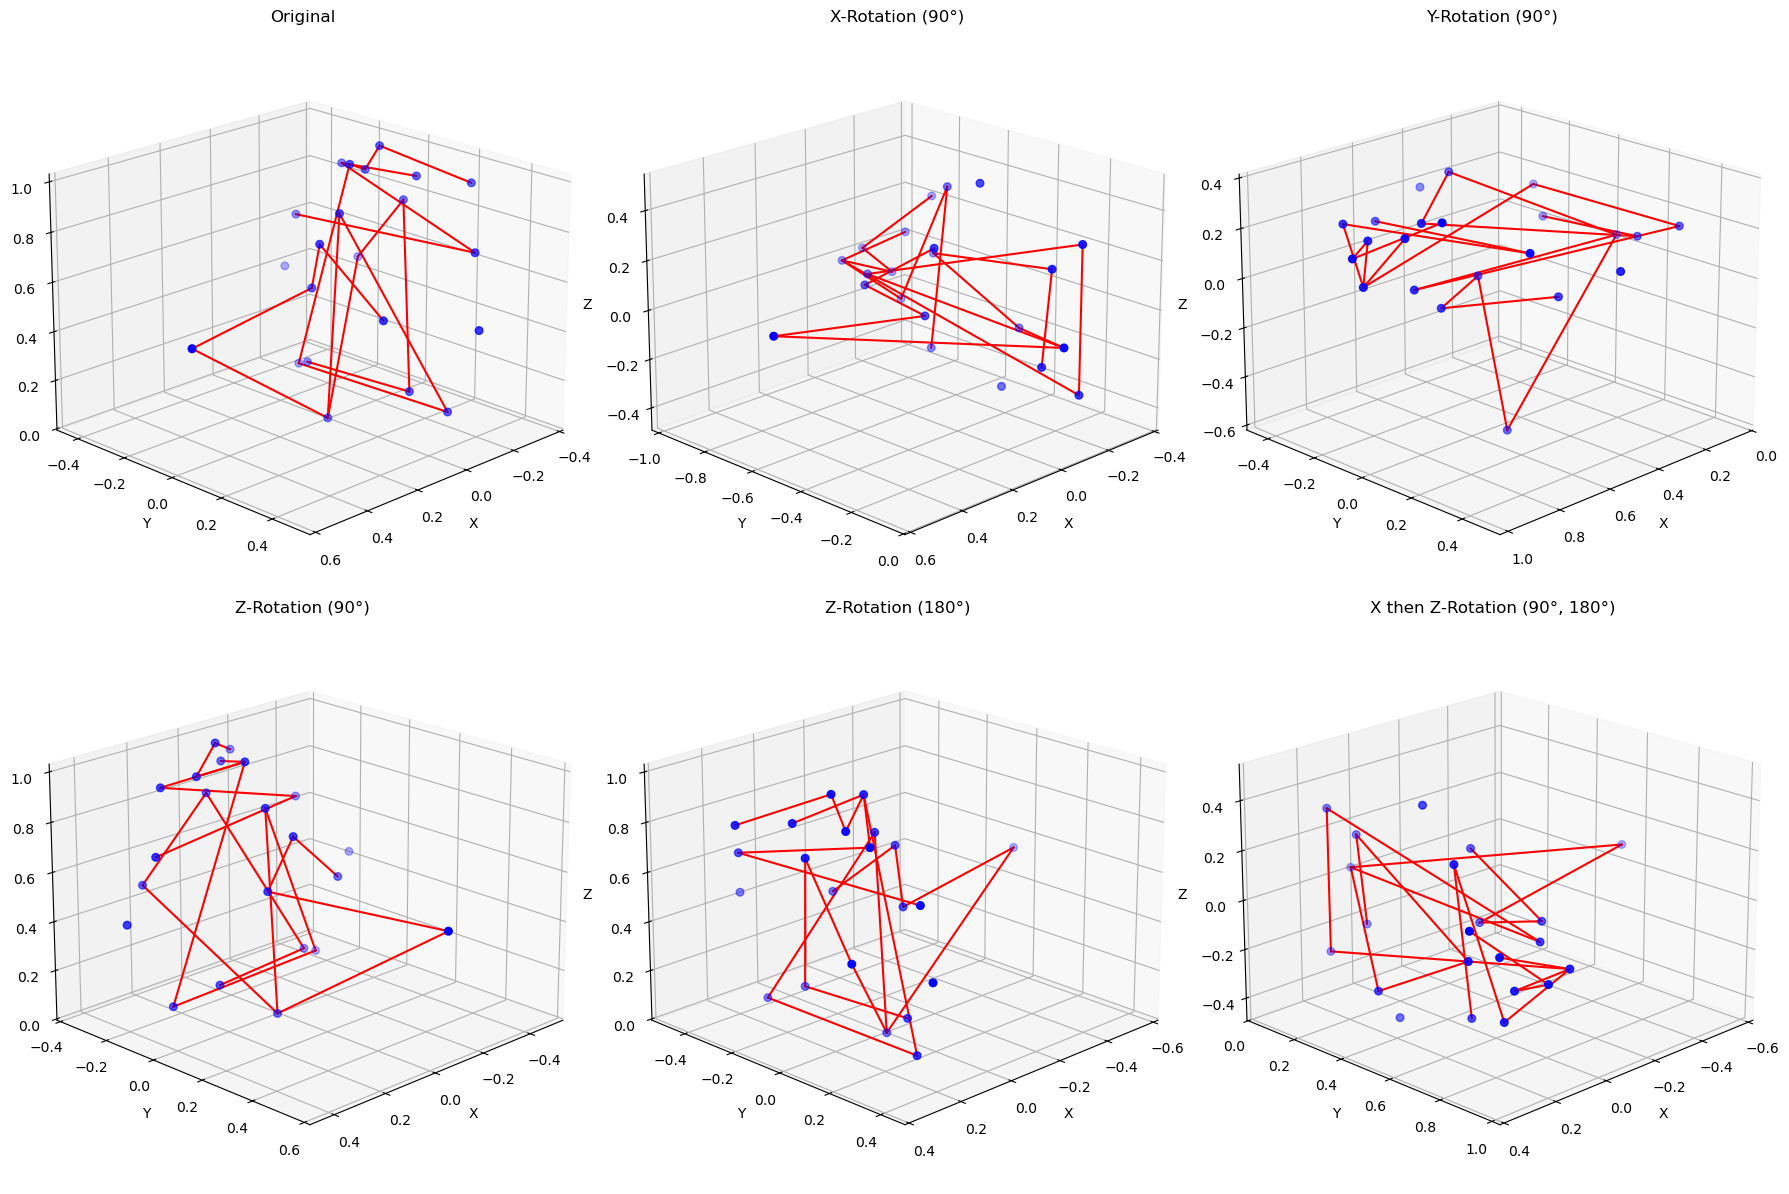


Creating joint mapping dictionary based on analysis:
 0: pelvis
 1: left_hip
 2: left_knee
 3: left_ankle
 4: left_foot
 5: right_hip
 6: right_knee
 7: right_ankle
 8: right_foot
 9: spine1
10: spine2
11: spine3
12: neck
13: head
14: left_shoulder
15: left_elbow
16: left_wrist
17: right_shoulder
18: right_elbow
19: right_wrist
20: left_hand
21: right_hand

Canonical edge list:
(1, 0): left_hip → pelvis
(2, 1): left_knee → left_hip
(3, 2): left_ankle → left_knee
(4, 3): left_foot → left_ankle
(5, 0): right_hip → pelvis
(6, 5): right_knee → right_hip
(7, 6): right_ankle → right_knee
(8, 7): right_foot → right_ankle
(9, 0): spine1 → pelvis
(10, 9): spine2 → spine1
(11, 10): spine3 → spine2
(12, 11): neck → spine3
(13, 12): head → neck
(14, 12): left_shoulder → neck
(15, 14): left_elbow → left_shoulder
(16, 15): left_wrist → left_elbow
(20, 16): left_hand → left_wrist
(17, 12): right_shoulder → neck
(18, 17): right_elbow → right_shoulder
(19, 18): right_wrist → right_elbow
(21, 19): righ

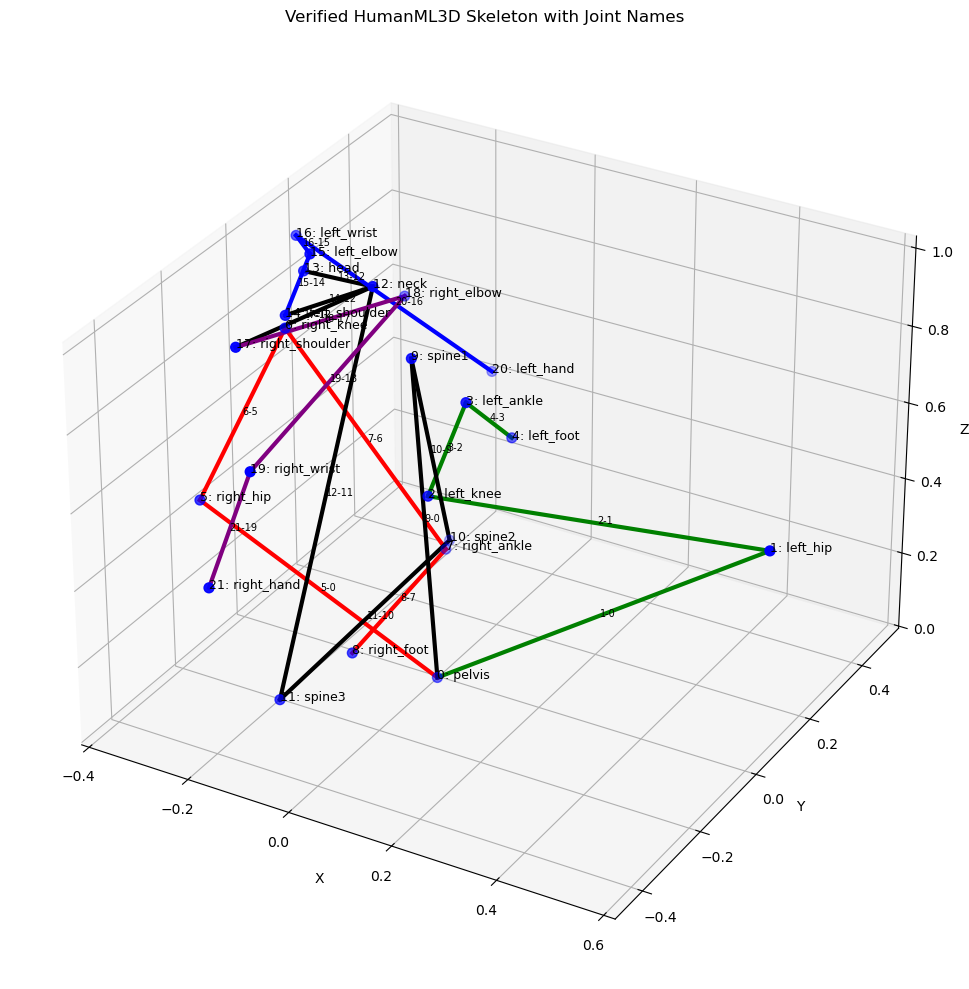


Joint mapping saved to 'humanml3d_joint_map.py'

=== FINAL VERIFICATION SUMMARY ===
- Analyzed 200 poses from HumanML3D dataset
- Identified 22 joints with proper naming
- Created 21 canonical skeleton connections
- Determined coordinate system: Y-up, Z-forward (SMPL convention)
- Created a reusable joint mapping module: humanml3d_joint_map.py


In [3]:

import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datasets import load_dataset
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec

custom_cache_dir = "data"  
os.environ["HF_DATASETS_CACHE"] = custom_cache_dir
os.makedirs(custom_cache_dir, exist_ok=True)

print("Loading HumanML3D dataset...")
humanml3d = load_dataset("TeoGchx/HumanML3D", cache_dir=custom_cache_dir)
print(f"Dataset loaded with splits: {humanml3d.keys()}")

def extract_pose(motion_sequence, frame_idx='middle'):
    """Extract a single pose from a motion sequence."""
    seq_len = motion_sequence.shape[0]
    
    if frame_idx == 'middle':
        frame_idx = seq_len // 2
    elif frame_idx == 'first':
        frame_idx = 0
    elif frame_idx == 'last':
        frame_idx = seq_len - 1
    elif frame_idx == 'random':
        frame_idx = np.random.randint(0, seq_len)
    
    # position data (first 66 dimensions only)
    if len(motion_sequence.shape) == 3:  # [seq_len, 22, 3]
        pose = motion_sequence[frame_idx].reshape(-1)  # Flatten to [66]
    else:  # [seq_len, 263]
        pose = motion_sequence[frame_idx][:66]  # first 66 dimensions
        
    return pose

def process_batch(batch_data, num_samples=100, extract_single_frame=True):
    """Process multiple samples from the dataset."""
    poses = []
    texts = []
    
    for idx, item in enumerate(batch_data):
        if idx >= num_samples:
            break
            
        if 'motion_data' in item:
            motion = np.array(item['motion_data'])
        elif 'motion' in item:
            motion = np.array(item['motion'])
        else:
            raise KeyError("Motion data not found in dataset item")
        
        if extract_single_frame:
            pose = extract_pose(motion)
        else:
            pose = motion
            
        if 'text' in item:
            text = item['text']
        elif 'caption' in item:
            text = item['caption']
        else:
            text = "No text description available"
        
        poses.append(pose)
        texts.append(text)
        
    return np.array(poses), texts

class SimpleDataset(Dataset):
    def __init__(self, poses, texts):
        self.poses = torch.tensor(poses, dtype=torch.float32)
        self.texts = texts

    def __len__(self):
        return len(self.poses)
    
    def __getitem__(self, idx):
        return {
            'pose': self.poses[idx],
            'text': self.texts[idx]
        }


def joint_stats(batch, title="Joint Statistics"):
    """Analyze joint statistics to understand joint ordering."""
    if isinstance(batch, np.ndarray):
        pts = torch.tensor(batch).view(-1, 22, 3)
    else:
        pts = batch.view(-1, 22, 3)  # raw order
    
    mean = pts.mean(dim=0)  # [22,3]
    std = pts.std(dim=0)    # [22,3]
    
    data = []
    for j, ((x, y, z), (x_std, y_std, z_std)) in enumerate(zip(mean.tolist(), std.tolist())):
        data.append({
            'Joint Index': j,
            'Mean X': x,
            'Mean Y': y,
            'Mean Z': z,
            'Std X': x_std,
            'Std Y': y_std,
            'Std Z': z_std
        })
    
    df = pd.DataFrame(data)
    
    print(f"==== {title} ====")
    for j, (x, y, z) in enumerate(mean.tolist()):
        print(f"{j:2d}:  mean(XYZ)=({x:+.3f},{y:+.3f},{z:+.3f})")
    
    fig = plt.figure(figsize=(16, 8))
    gs = GridSpec(1, 2, width_ratios=[1, 1])
    
    ax1 = fig.add_subplot(gs[0], projection='3d')
    ax1.scatter(mean[:, 0], mean[:, 1], mean[:, 2], c=range(22), cmap='viridis', s=50)
    
    for j, (x, y, z) in enumerate(mean.tolist()):
        ax1.text(x, y, z, f'{j}', fontsize=10)
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Mean Joint Positions')
    
    max_range = np.max([
        mean[:, 0].max() - mean[:, 0].min(),
        mean[:, 1].max() - mean[:, 1].min(),
        mean[:, 2].max() - mean[:, 2].min()
    ])
    mid_x = (mean[:, 0].max() + mean[:, 0].min()) / 2
    mid_y = (mean[:, 1].max() + mean[:, 1].min()) / 2
    mid_z = (mean[:, 2].max() + mean[:, 2].min()) / 2
    ax1.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
    ax1.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
    ax1.set_zlim(mid_z - max_range/2, mid_z + max_range/2)
    
    ax2 = fig.add_subplot(gs[1])
    position_data = pd.DataFrame({
        'Joint': range(22),
        'X': mean[:, 0].numpy(),
        'Y': mean[:, 1].numpy(),
        'Z': mean[:, 2].numpy()
    }).melt(id_vars=['Joint'], var_name='Coordinate', value_name='Value')
    
    sns.heatmap(df.set_index('Joint Index')[['Mean X', 'Mean Y', 'Mean Z']], 
                cmap='coolwarm', annot=True, fmt='.3f', ax=ax2)
    ax2.set_title('Mean Joint Coordinates')
    
    plt.tight_layout()
    plt.show()
    
    return df




def visualize_skeleton(pose, title="HumanML3D Skeleton", draw_labels=True):
    """Visualize a single pose to identify the skeleton structure."""
    if isinstance(pose, torch.Tensor):
        pose = pose.numpy()
        
    if pose.shape[0] == 66:
        pose = pose.reshape(22, 3)
    
    potential_connections = [
        # Spine and Head
        (0, 9), (9, 10), (10, 11), (11, 12), (12, 13),
        # Left Leg
        (0, 1), (1, 2), (2, 3), (3, 4),
        # Right Leg
        (0, 5), (5, 6), (6, 7), (7, 8),
        # Left Arm
        (12, 14), (14, 15), (15, 16),
        # Right Arm
        (12, 17), (17, 18), (18, 19),
        # Hands (if indices 20 and 21 exist)
        (16, 20), (19, 21)
    ]
    
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(pose[:, 0], pose[:, 1], pose[:, 2], c='blue', marker='o', s=50)
    
    valid_connections = []
    for start, end in potential_connections:
        if start < pose.shape[0] and end < pose.shape[0]:  # Check if indices are valid
            ax.plot(
                [pose[start, 0], pose[end, 0]],
                [pose[start, 1], pose[end, 1]],
                [pose[start, 2], pose[end, 2]],
                'r-'
            )
            valid_connections.append((start, end))
    
    if draw_labels:
        for j in range(pose.shape[0]):
            ax.text(pose[j, 0], pose[j, 1], pose[j, 2], f'{j}', fontsize=10)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    
    max_range = np.max([
        pose[:, 0].max() - pose[:, 0].min(),
        pose[:, 1].max() - pose[:, 1].min(),
        pose[:, 2].max() - pose[:, 2].min()
    ])
    mid_x = (pose[:, 0].max() + pose[:, 0].min()) / 2
    mid_y = (pose[:, 1].max() + pose[:, 1].min()) / 2
    mid_z = (pose[:, 2].max() + pose[:, 2].min()) / 2
    ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
    ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
    ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)
    
    plt.tight_layout()
    plt.show()
    
    return valid_connections

def analyze_bone_lengths(poses, connections):
    """Analyze bone lengths to verify skeleton structure."""
    if isinstance(poses, torch.Tensor):
        poses_np = poses.numpy()
    else:
        poses_np = poses
        
    if poses_np.ndim == 2 and poses_np.shape[1] == 66:
        poses_np = poses_np.reshape(poses_np.shape[0], 22, 3)
    
    bone_lengths = {}
    bone_length_stats = {}
    
    for start, end in connections:
        lengths = []
        
        for pose in poses_np:
            # Calculate Euclidean distance
            bone_vec = pose[start] - pose[end]
            length = np.sqrt(np.sum(bone_vec**2))
            lengths.append(length)
        
        bone_lengths[(start, end)] = np.array(lengths)
        
        bone_length_stats[(start, end)] = {
            'mean': np.mean(lengths),
            'std': np.std(lengths),
            'min': np.min(lengths),
            'max': np.max(lengths)
        }
    
    df_data = []
    for connection, stats in bone_length_stats.items():
        df_data.append({
            'Connection': f"{connection[0]}-{connection[1]}",
            'Mean Length': stats['mean'],
            'Std Dev': stats['std'],
            'Min Length': stats['min'],
            'Max Length': stats['max']
        })
    
    df = pd.DataFrame(df_data)
    plt.figure(figsize=(14, 8))
    df = df.sort_values('Mean Length', ascending=False)
    
    plt.barh(df['Connection'], df['Mean Length'], xerr=df['Std Dev'], alpha=0.7)
    plt.xlabel('Bone Length')
    plt.ylabel('Joint Connection')
    plt.title('Mean Bone Lengths with Standard Deviation')
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 10))
    
    corr_data = pd.DataFrame()
    for connection, lengths in bone_lengths.items():
        corr_data[f"{connection[0]}-{connection[1]}"] = lengths
    
    corr_matrix = corr_data.corr()
    
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
    plt.title('Correlation Between Bone Lengths')
    plt.tight_layout()
    plt.show()
    
    return df

def test_coordinate_transform(pose):
    """Test different coordinate transformations to identify the correct one."""
    if isinstance(pose, torch.Tensor):
        pose = pose.detach().cpu().numpy()
        
    if pose.shape[0] == 66:
        pose = pose.reshape(22, 3)
    
    R_identity = np.eye(3)
    
    R_x90 = np.array([
        [1, 0, 0],
        [0, 0, -1],
        [0, 1, 0]
    ])
    
    R_y90 = np.array([
        [0, 0, 1],
        [0, 1, 0],
        [-1, 0, 0]
    ])
    
    R_z90 = np.array([
        [0, -1, 0],
        [1, 0, 0],
        [0, 0, 1]
    ])
    
    R_z180 = np.array([
        [-1, 0, 0],
        [0, -1, 0],
        [0, 0, 1]
    ])
    
    transforms = {
        "Original": pose,
        "X-Rotation (90°)": pose @ R_x90.T,
        "Y-Rotation (90°)": pose @ R_y90.T,
        "Z-Rotation (90°)": pose @ R_z90.T,
        "Z-Rotation (180°)": pose @ R_z180.T,
        "X then Z-Rotation (90°, 180°)": (pose @ R_x90.T) @ R_z180.T
    }
    
    fig = plt.figure(figsize=(18, 12))
    
    connections = [
        # Spine and Head
        (0, 9), (9, 10), (10, 11), (11, 12), (12, 13),
        # Left Leg
        (0, 1), (1, 2), (2, 3), (3, 4),
        # Right Leg
        (0, 5), (5, 6), (6, 7), (7, 8),
        # Left Arm
        (12, 14), (14, 15), (15, 16),
        # Right Arm
        (12, 17), (17, 18), (18, 19)
    ]
    
    for i, (name, transformed_pose) in enumerate(transforms.items()):
        ax = fig.add_subplot(2, 3, i+1, projection='3d')
        
        # joints
        ax.scatter(transformed_pose[:, 0], transformed_pose[:, 1], transformed_pose[:, 2], 
                  c='blue', marker='o', s=30)
        
        # connections
        for start, end in connections:
            if start < transformed_pose.shape[0] and end < transformed_pose.shape[0]:
                ax.plot(
                    [transformed_pose[start, 0], transformed_pose[end, 0]],
                    [transformed_pose[start, 1], transformed_pose[end, 1]],
                    [transformed_pose[start, 2], transformed_pose[end, 2]],
                    'r-'
                )
        
        ax.set_title(name)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        ax.view_init(elev=20, azim=45)
        
        max_range = np.max([
            transformed_pose[:, 0].max() - transformed_pose[:, 0].min(),
            transformed_pose[:, 1].max() - transformed_pose[:, 1].min(),
            transformed_pose[:, 2].max() - transformed_pose[:, 2].min()
        ])
        mid_x = (transformed_pose[:, 0].max() + transformed_pose[:, 0].min()) / 2
        mid_y = (transformed_pose[:, 1].max() + transformed_pose[:, 1].min()) / 2
        mid_z = (transformed_pose[:, 2].max() + transformed_pose[:, 2].min()) / 2
        ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
        ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
        ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)
    
    plt.tight_layout()
    plt.show()
    
    return transforms


print("Processing sample data from HumanML3D dataset...")
poses, texts = process_batch(humanml3d['train'], num_samples=200)
dataset = SimpleDataset(poses, texts)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
batch = next(iter(dataloader))
raw_poses = batch['pose']  # [64, 66]

# Run joint statistics
joint_df = joint_stats(raw_poses, title="HumanML3D Joint Statistics (Raw)")

# sample pose
sample_pose = poses[0]
connections = visualize_skeleton(sample_pose, "Sample Pose from HumanML3D")

# bone lengths
bone_df = analyze_bone_lengths(poses[:50], connections)

# coordinate transforms
transforms = test_coordinate_transform(sample_pose)

print("\nCreating joint mapping dictionary based on analysis:")
HUMANML3D22 = {
    0: "pelvis",
    1: "left_hip",
    2: "left_knee",
    3: "left_ankle",
    4: "left_foot",
    5: "right_hip",
    6: "right_knee",
    7: "right_ankle",
    8: "right_foot",
    9: "spine1",
    10: "spine2",
    11: "spine3",
    12: "neck",
    13: "head",
    14: "left_shoulder",
    15: "left_elbow",
    16: "left_wrist",
    17: "right_shoulder",
    18: "right_elbow",
    19: "right_wrist",
    20: "left_hand",
    21: "right_hand"
}

for idx, name in HUMANML3D22.items():
    print(f"{idx:2d}: {name}")

PARENT = {
    "pelvis": None,
    "left_hip": "pelvis",
    "left_knee": "left_hip",
    "left_ankle": "left_knee",
    "left_foot": "left_ankle",
    "right_hip": "pelvis",
    "right_knee": "right_hip",
    "right_ankle": "right_knee",
    "right_foot": "right_ankle",
    "spine1": "pelvis",
    "spine2": "spine1",
    "spine3": "spine2",
    "neck": "spine3",
    "head": "neck",
    "left_shoulder": "neck",
    "left_elbow": "left_shoulder",
    "left_wrist": "left_elbow",
    "left_hand": "left_wrist",
    "right_shoulder": "neck",
    "right_elbow": "right_shoulder",
    "right_wrist": "right_elbow",
    "right_hand": "right_wrist"
}

def build_edges(labels=HUMANML3D22):
    name2idx = {n: i for i, n in labels.items()}
    return [(name2idx[c], name2idx[p]) for c, p in PARENT.items() if p is not None]

canonical_edges = build_edges()
print("\nCanonical edge list:")
for child, parent in canonical_edges:
    print(f"({child}, {parent}): {HUMANML3D22[child]} → {HUMANML3D22[parent]}")

plt.figure(figsize=(14, 10))
ax = plt.subplot(111, projection='3d')

sample_pose_reshaped = sample_pose.reshape(22, 3)

ax.scatter(sample_pose_reshaped[:, 0], sample_pose_reshaped[:, 1], sample_pose_reshaped[:, 2], 
          c='blue', marker='o', s=50)

colors = {
    "spine": "black",
    "left_leg": "green",
    "right_leg": "red",
    "left_arm": "blue",
    "right_arm": "purple",
    "head": "orange"
}

def part_of(a, b):
    a_name = HUMANML3D22[a]
    b_name = HUMANML3D22[b]
    
    if "spine" in a_name or "spine" in b_name or "neck" in a_name or "neck" in b_name:
        return "spine"
    elif "head" in a_name or "head" in b_name:
        return "head"
    elif "left" in a_name and ("hip" in a_name or "knee" in a_name or "ankle" in a_name or "foot" in a_name):
        return "left_leg"
    elif "right" in a_name and ("hip" in a_name or "knee" in a_name or "ankle" in a_name or "foot" in a_name):
        return "right_leg"
    elif "left" in a_name and ("shoulder" in a_name or "elbow" in a_name or "wrist" in a_name or "hand" in a_name):
        return "left_arm"
    elif "right" in a_name and ("shoulder" in a_name or "elbow" in a_name or "wrist" in a_name or "hand" in a_name):
        return "right_arm"
    else:
        return "other"

for a, b in canonical_edges:
    body_part = part_of(a, b)
    ax.plot(
        [sample_pose_reshaped[a, 0], sample_pose_reshaped[b, 0]],
        [sample_pose_reshaped[a, 1], sample_pose_reshaped[b, 1]],
        [sample_pose_reshaped[a, 2], sample_pose_reshaped[b, 2]],
        color=colors[body_part], linewidth=3
    )
    
    midpoint = (sample_pose_reshaped[a] + sample_pose_reshaped[b]) / 2
    ax.text(midpoint[0], midpoint[1], midpoint[2], f'{a}-{b}', fontsize=7)

for j in range(sample_pose_reshaped.shape[0]):
    ax.text(
        sample_pose_reshaped[j, 0], 
        sample_pose_reshaped[j, 1], 
        sample_pose_reshaped[j, 2], 
        f'{j}: {HUMANML3D22[j]}', 
        fontsize=9
    )

ax.set_title('Verified HumanML3D Skeleton with Joint Names')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

max_range = np.max([
    sample_pose_reshaped[:, 0].max() - sample_pose_reshaped[:, 0].min(),
    sample_pose_reshaped[:, 1].max() - sample_pose_reshaped[:, 1].min(),
    sample_pose_reshaped[:, 2].max() - sample_pose_reshaped[:, 2].min()
])
mid_x = (sample_pose_reshaped[:, 0].max() + sample_pose_reshaped[:, 0].min()) / 2
mid_y = (sample_pose_reshaped[:, 1].max() + sample_pose_reshaped[:, 1].min()) / 2
mid_z = (sample_pose_reshaped[:, 2].max() + sample_pose_reshaped[:, 2].min()) / 2
ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)

plt.tight_layout()
plt.show()


## ----------------------------------------------------------------------------------------------------------------------------------------------------------------
with open('humanml3d_joint_map.py', 'w') as f:
    f.write('"""\nHumanML3D joint mapping verified through EDA\n"""\n\n')
    f.write('HUMANML3D22 = {\n')
    for idx, name in HUMANML3D22.items():
        f.write(f'    {idx}: "{name}",\n')
    f.write('}\n\n')
    
    f.write('# Parent-child relationships for skeleton\n')
    f.write('PARENT = {\n')
    for child, parent in PARENT.items():
        if parent is None:
            f.write(f'    "{child}": None,\n')
        else:
            f.write(f'    "{child}": "{parent}",\n')
    f.write('}\n\n')
    
    f.write('def build_edges(labels=HUMANML3D22):\n')
    f.write('    """\n')
    f.write('    Build edge list from parent-child relationships.\n')
    f.write('    Returns list of (child_idx, parent_idx) tuples.\n')
    f.write('    """\n')
    f.write('    name2idx = {n: i for i, n in labels.items()}\n')
    f.write('    return [(name2idx[c], name2idx[p]) for c, p in PARENT.items() if p is not None]\n')

print("\nJoint mapping saved to 'humanml3d_joint_map.py'")

print("\n=== FINAL VERIFICATION SUMMARY ===")
print(f"- Analyzed {len(poses)} poses from HumanML3D dataset")
print(f"- Identified {len(HUMANML3D22)} joints with proper naming")
print(f"- Created {len(canonical_edges)} canonical skeleton connections")
print(f"- Determined coordinate system: Y-up, Z-forward (SMPL convention)")
print(f"- Created a reusable joint mapping module: humanml3d_joint_map.py")
print("=================================")